# Appliances Energy Prediction

## Data Description
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in - Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- T_out, Temperature outside (from Chievres weather station), in Celsius
- Press_mm_hg, Pressure (from Chievres weather station), in mm Hg
RH_out
- RH_out, Humidity outside (from Chievres weather - station), in %
- Windspeed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), °C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [ ]:
# Some libraries that are used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot



In [ ]:

plt.style.use('fivethirtyeight')
mpl.rc("figure", figsize=(20, 6))


In [ ]:
# Read data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistic/energydata_complete.csv')
df


date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

We found that there are not many meanings for predicting energy in 10 minutes. Hence, we will resample the data into hour frequency.

In [ ]:
df['date'] = pd.to_datetime(df.date , format = '%Y-%m-%d %H:%M:%S')
data = df.drop(['date'], axis=1)

# Set index for the data
data.index = df.date

# Resampling data
data=data.resample('H').mean()
data

Appliances     lights         T1       RH_1         T2  \
date                                                                          
2016-01-11 17:00:00   55.000000  35.000000  19.890000  46.502778  19.200000   
2016-01-11 18:00:00  176.666667  51.666667  19.897778  45.879028  19.268889   
2016-01-11 19:00:00  173.333333  25.000000  20.495556  52.805556  19.925556   
2016-01-11 20:00:00  125.000000  35.000000  20.961111  48.453333  20.251111   
2016-01-11 21:00:00  103.333333  23.333333  21.311667  45.768333  20.587778   
...                         ...        ...        ...        ...        ...   
2016-05-27 14:00:00  101.666667   1.666667  25.544444  46.638889  26.421369   
2016-05-27 15:00:00   76.666667   0.000000  25.500000  45.677639  26.154762   
2016-05-27 16:00:00  135.000000   0.000000  25.487778  46.250000  26.000000   
2016-05-27 17:00:00  180.000000   3.333333  25.533333  46.783333  25.772190   
2016-05-27 18:00:00  430.000000  10.000000  25.500000  46.600000  25.264286   

                          RH_2         T3       RH_3         T4       RH_4  \
date                                                                         
2016-01-11 17:00:00  44.626528  19.790000  44.897778  18.932778  45.738750   
2016-01-11 18:00:00  44.438889  19.770000  44.863333  18.908333  46.066667   
2016-01-11 19:00:00  46.061667  20.052222  47.227361  18.969444  47.815556   
2016-01-11 20:00:00  45.632639  20.213889  47.268889  19.190833  49.227917   
2016-01-11 21:00:00  44.961111  20.373333  46.164444  19.425556  47.918889   
...                        ...        ...        ...        ...        ...   
2016-05-27 14:00:00  41.205054  28.397778  41.160000  24.666667  45.883889   
2016-05-27 15:00:00  41.041238  28.240000  40.306667  24.694444  45.270000   
2016-05-27 16:00:00  41.736190  27.953333  40.607778  24.700000  45.476667   
2016-05-27 17:00:00  42.495476  27.164444  41.247778  24.700000  45.658889   
2016-05-27 18:00:00  42.971429  26.823333  41.156667  24.700000  45.963333   

                     ...         T9       RH_9      T_out  Press_mm_hg  \
date                 ...                                                 
2016-01-11 17:00:00  ...  17.016667  45.446667   6.308333   733.750000   
2016-01-11 18:00:00  ...  16.981667  45.290000   5.941667   734.266667   
2016-01-11 19:00:00  ...  16.902222  45.311389   6.000000   734.791667   
2016-01-11 20:00:00  ...  16.890000  45.118889   6.000000   735.283333   
2016-01-11 21:00:00  ...  16.890000  44.807778   5.833333   735.566667   
...                  ...        ...        ...        ...          ...   
2016-05-27 14:00:00  ...  23.100000  46.594444  21.916667   755.800000   
2016-05-27 15:00:00  ...  23.138889  46.590000  22.216667   755.675000   
2016-05-27 16:00:00  ...  23.193333  46.645381  22.883333   755.375000   
2016-05-27 17:00:00  ...  23.200000  46.780655  22.666667   755.200000   
2016-05-27 18:00:00  ...  23.200000  46.845000  22.200000   755.200000   

                        RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
date                                                                          
2016-01-11 17:00:00  92.000000   6.166667   53.416667   5.050000  26.823044   
2016-01-11 18:00:00  91.583333   5.416667   40.000000   4.658333  22.324206   
2016-01-11 19:00:00  89.750000   6.000000   40.000000   4.391667  33.734932   
2016-01-11 20:00:00  87.583333   6.000000   40.000000   4.016667  25.679642   
2016-01-11 21:00:00  87.416667   6.000000   40.000000   3.816667  18.826274   
...                        ...        ...         ...        ...        ...   
2016-05-27 14:00:00  59.000000   2.000000   21.583333  13.475000  27.553946   
2016-05-27 15:00:00  57.333333   2.000000   21.833333  13.258333  25.429025   
2016-05-27 16:00:00  55.000000   2.416667   22.583333  13.283333  23.229344   
2016-05-27 17:00:00  55.833333   3.416667   24.083333  13.316667  27.186003   
2016-05-27 18:00:00  57.000000   4.000000   27.000000  13.200000  3

Display data corresponding on day

In [ ]:
data['WEEKDAY'] = ((pd.to_datetime(data.index).dayofweek)// 5 == 1).astype(float)
data['WEEKDAY'].value_counts()

0.0    2378
1.0     912
Name: WEEKDAY, dtype: int64

In [ ]:
temp_weekday =  data[data['WEEKDAY'] == 0]

visData = go.Scatter( x= temp_weekday.index  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Weekday Appliances' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [ ]:
temp_weekday.describe()

Appliances       lights           T1         RH_1           T2  \
count  2378.000000  2378.000000  2378.000000  2378.000000  2378.000000   
mean     96.704514     4.056630    21.677084    40.307889    20.349823   
std      81.501868     7.084453     1.594848     3.863855     2.187578   
min      28.333333     0.000000    17.408333    27.509167    16.200000   
25%      50.000000     0.000000    20.715000    37.434479    18.844514   
50%      61.666667     0.000000    21.585556    39.713681    19.920556   
75%     109.583333     5.000000    22.633333    43.121806    21.537708   
max     563.333333    51.666667    26.203333    53.460278    29.187778   

              RH_2           T3         RH_3           T4         RH_4  ...  \
count  2378.000000  2378.000000  2378.000000  2378.000000  2378.000000  ...   
mean     40.426267    22.280791    39.270138    20.974494    38.945456  ...   
std       4.043439     2.015318     3.146178     1.998299     4.239907  ...   
min      21.010000    17.790000    31.051944    15.588889    28.715571  ...   
25%      37.805278    20.776741    37.017302    19.633333    35.551736  ...   
50%      40.477778    22.104167    38.575278    20.800556    38.392817  ...   
75%      43.274444    23.323333    41.638611    22.284444    41.974722  ...   
max      50.851111    28.975286    48.594444    26.144762    50.747222  ...   

              RH_9        T_out  Press_mm_hg       RH_out    Windspeed  \
count  2378.000000  2378.000000  2378.000000  2378.000000  2378.000000   
mean     41.471704     7.285730   755.709013    79.765174     3.903631   
std       4.077625     5.339010     7.102209    14.526697     2.414134   
min      29.218889    -4.961111   729.383333    28.416667     0.416667   
25%      38.473333     3.583333   751.125000    70.666667     2.000000   
50%      40.760417     6.875000   756.258333    83.333333     3.416667   
75%      44.094701    10.300000   760.839583    91.250000     5.312500   
max      53.140000    23.408333   772.258333   100.000000    13.000000   

        Visibility    Tdewpoint          rv1          rv2  WEEKDAY  
count  2378.000000  2378.000000  2378.000000  2378.000000   2378.0  
mean     38.725259     3.655358    24.997699    24.997699      0.0  
std      11.341998     4.227992     5.961328     5.961328      0.0  
min       1.000000    -6.475000     5.259551     5.259551      0.0  
25%      32.416667     0.660417    20.791817    20.791817      0.0  
50%      40.000000     3.400000    24.932976    24.932976      0.0  
75%      40.000000     6.556250    29.100607    29.100607      0.0  
max      66.000000    15.250000    43.611051    43.611051      0.0  

[8 rows x 29 columns]

In [ ]:
temp_weekdend =  data[data['WEEKDAY'] == 1]

visData = go.Scatter( x= temp_weekdend.index  ,  mode = "lines", y = temp_weekdend.Appliances )
layout = go.Layout(title = 'Weekday Appliances' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [ ]:
temp_weekdend.describe()

Appliances      lights          T1        RH_1          T2        RH_2  \
count  912.000000  912.000000  912.000000  912.000000  912.000000  912.000000   
mean   100.581140    3.143275   21.714794   40.139985   20.323286   40.407506   
std     80.434337    6.352874    1.635149    4.140457    2.196166    4.082466   
min     30.000000    0.000000   16.790000   30.981111   16.100000   26.785327   
25%     51.666667    0.000000   20.847222   37.114757   18.784583   38.107882   
50%     68.333333    0.000000   21.628472   39.408333   20.165972   40.524444   
75%    113.333333    1.666667   22.628750   42.733437   21.463750   43.225709   
max    608.333333   36.666667   25.650000   53.980139   29.727778   53.914975   

               T3        RH_3          T4        RH_4  ...        RH_9  \
count  912.000000  912.000000  912.000000  912.000000  ...  912.000000   
mean    22.237407   39.172185   20.548145   39.245615  ...   41.767651   
std      1.979741    3.489514    2.118473    4.575462  ...    4.305759   
min     17.245000   29.700556   15.100000   29.422667  ...   29.977429   
25%     20.803194   36.590000   19.345556   35.446210  ...   38.688750   
50%     22.052946   38.415417   20.235833   38.485278  ...   40.993889   
75%     23.290000   42.019028   21.720250   42.619167  ...   44.934549   
max     27.928333   49.472222   25.210714   50.583056  ...   51.511667   

            T_out  Press_mm_hg      RH_out   Windspeed  Visibility  \
count  912.000000   912.000000  912.000000  912.000000  912.000000   
mean     7.753545   755.036248   79.691155    4.394645   37.292032   
std      5.242837     8.104611   15.601388    2.439794   10.803915   
min     -2.508333   730.941667   25.250000    0.416667    2.000000   
25%      3.808333   750.656250   69.395833    2.416667   29.000000   
50%      7.008333   754.654167   84.208333    4.000000   40.000000   
75%     10.593750   761.189583   92.166667    6.000000   40.000000   
max     25.933333   770.658333  100.000000   13.000000   65.000000   

        Tdewpoint         rv1         rv2  WEEKDAY  
count  912.000000  912.000000  912.000000    912.0  
mean     4.044024   24.971175   24.971175      1.0  
std      4.085475    5.898719    5.898719      0.0  
min     -5.066667    7.727138    7.727138      1.0  
25%      1.439583   20.678809   20.678809      1.0  
50%      3.516667   25.047299   25.047299      1.0  
75%      6.583333   29.103808   29.103808      1.0  
max     14.925000   42.049513   42.049513      1.0  

[8 rows x 29 columns]

In [ ]:
# Usage group by day name
data['day_name']=data.index.day_name()
data_day_name = data.groupby(['day_name'])
data[data['Appliances'] > 200].groupby(['day_name']).count()['Appliances']

day_name
Friday       71
Monday       74
Saturday     59
Sunday       38
Thursday     41
Tuesday      35
Wednesday    28
Name: Appliances, dtype: int64

In [ ]:
#Percentage of usage < 200
print(((data['Appliances'][data['Appliances'] <= 200].count()) / (len(data)))*100 )

89.48328267477204


Display data corresponding on hour

In [ ]:
data['hour']=data.index.hour
temp=data.groupby(['hour']).mean()
temp

<ipython-input-72-f5213936254c>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Appliances    lights         T1       RH_1         T2       RH_2  \
hour                                                                     
0      52.785888  3.187348  21.984336  39.948119  20.071736  41.147910   
1      51.326034  1.301703  21.808582  39.960783  19.819235  41.360955   
2      49.075426  0.425791  21.648167  39.940365  19.597539  41.536939   
3      48.236010  0.304136  21.497259  39.924989  19.403972  41.710852   
4      49.355231  0.206813  21.359599  39.926795  19.231141  41.865273   
5      52.737226  0.644769  21.238172  40.023475  19.079161  42.119016   
6      57.712895  1.082725  21.145559  40.149970  18.979968  42.376173   
7      78.649635  3.467153  21.074625  40.380559  18.984885  42.500344   
8     106.143552  4.294404  21.045174  40.621922  19.419363  41.959527   
9     112.785888  4.537713  21.062342  40.743377  20.129343  40.932613   
10    125.377129  4.708029  21.131716  40.834033  20.734925  40.011388   
11    133.126521  3.576642  21.245400  40.779384  21.048057  39.272468   
12    123.637470  3.211679  21.419656  40.734936  21.166696  38.926979   
13    124.744526  2.834550  21.632526  40.391453  21.213473  38.743808   
14    108.284672  2.871046  21.797301  39.888799  21.213783  38.457277   
15    105.827251  2.469586  21.922897  39.529234  21.209705  38.278771   
16    119.902676  2.773723  21.988784  39.599995  21.159579  38.386486   
17    161.352657  4.589372  21.997294  39.790692  21.036274  38.627527   
18    191.811594  7.415459  22.084144  40.962049  20.955079  39.532629   
19    143.065693  7.360097  22.239580  41.785569  20.949068  40.266108   
20    126.982968  9.537713  22.344471  40.556814  20.940599  40.335362   
21     96.496350  7.810219  22.373094  40.078591  20.854341  40.408332   
22     69.148418  7.165450  22.300952  39.831042  20.650391  40.520134   
23     56.982968  5.474453  22.154110  39.887662  20.361347  40.848302   

             T3       RH_3         T4       RH_4  ...       RH_9      T_out  \
hour                                              ...                         
0     22.264619  39.485005  21.063244  39.240432  ...  41.716056   6.072972   
1     22.267202  39.543076  20.914659  39.179648  ...  42.324275   5.792174   
2     22.280853  39.598763  20.757661  39.130853  ...  42.822340   5.556792   
3     22.281183  39.664058  20.616136  39.095897  ...  43.220873   5.299311   
4     22.268101  39.711160  20.497575  39.088779  ...  43.499716   5.047476   
5     22.230471  39.670689  20.395547  39.086657  ...  43.716272   4.889751   
6     22.154772  39.567709  20.308784  39.144106  ...  43.776498   4.836766   
7     22.085462  39.464289  20.267484  39.271772  ...  43.518019   5.034693   
8     22.017272  39.152629  20.390519  39.332410  ...  42.707096   5.649926   
9     21.972464  39.016793  20.641993  39.264225  ...  41.965432   6.587756   
10    21.954526  39.021666  20.833247  39.210794  ...  41.591995   7.628902   
11    22.063100  39.133525  20.971180  39.129952  ...  41.365793   8.571446   
12    22.234159  39.254614  21.045046  38.993689  ...  41.147622   9.296928   
13    22.332005  39.206889  21.052235  38.817797  ...  40.973656   9.845134   
14    22.393777  38.993874  21.077734  38.612559  ...  40.878150  10.228315   
15    22.395606  38.653145  21.094236  38.477576  ...  40.776285  10.400365   
16    22.425709  38.628133  21.079169  38.447681  ...  40.648438  10.290166   
17    22.405707  38.635702  21.038431  38.555516  ...  40.413030   9.972122   
18    22.439208  38.793913  21.036050  38.718041  ...  40.146151   9.502254   
19    22.480641  39.300987  20.960720  39.109976  ...  39.809328   8.777068   
20    22.454369  39.343256  21.043971  39.332498  ...  39.608735   8.058029   
21    22.410355  39.289454  21.177825  39.115844  ...  39.523775   7.351399   
22    22.356174  39.302963  21.149653  39.078489  ...  40.105270   6.827616   
23    22.280379  39.407057  21.135665  39.258388  ...  41.053585   6.418593   

      Press_mm_hg     RH_o

In [ ]:
temp[['Appliances','T_out','T5','RH_5']]

Appliances      T_out         T5       RH_5
hour                                             
0      52.785888   6.072972  19.773448  52.362147
1      51.326034   5.792174  19.669697  51.532949
2      49.075426   5.556792  19.584937  50.933282
3      48.236010   5.299311  19.514343  50.503634
4      49.355231   5.047476  19.452120  50.157246
5      52.737226   4.889751  19.398241  49.879691
6      57.712895   4.836766  19.361282  49.889842
7      78.649635   5.034693  19.356990  49.991349
8     106.143552   5.649926  19.360290  49.834700
9     112.785888   6.587756  19.382910  50.156020
10    125.377129   7.628902  19.434725  51.291494
11    133.126521   8.571446  19.433021  50.623324
12    123.637470   9.296928  19.438146  49.956291
13    124.744526   9.845134  19.446664  49.916264
14    108.284672  10.228315  19.458837  48.860902
15    105.827251  10.400365  19.498147  47.812434
16    119.902676  10.290166  19.539011  47.226693
17    161.352657   9.972122  19.585355  47.113658
18    191.811594   9.502254  19.647358  47.968790
19    143.065693   8.777068  19.743658  51.749918
20    126.982968   8.058029  20.007391  57.572569
21     96.496350   7.351399  20.177135  58.231320
22     69.148418   6.827616  20.068961  55.586589
23     56.982968   6.418593  19.899474  53.689039

In [ ]:
corr = temp.corr()
corr

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.577677  0.191877  0.540850  0.719646 -0.688775   
lights         0.577677  1.000000  0.584871  0.455788  0.535695 -0.266838   
T1             0.191877  0.584871  1.000000 -0.158763  0.560028 -0.401369   
RH_1           0.540850  0.455788 -0.158763  1.000000  0.159987  0.017557   
T2             0.719646  0.535695  0.560028  0.159987  1.000000 -0.938961   
RH_2          -0.688775 -0.266838 -0.401369  0.017557 -0.938961  1.000000   
T3             0.203484  0.296728  0.864851 -0.218643  0.468759 -0.435884   
RH_3          -0.778806 -0.347634 -0.216403 -0.022203 -0.724117  0.805454   
T4             0.400932  0.500318  0.791254 -0.083689  0.879292 -0.769093   
RH_4          -0.436801  0.120530 -0.296649  0.361206 -0.555754  0.767398   
T5            -0.035018  0.670422  0.861155 -0.099967  0.320970 -0.062877   
RH_5          -0.252173  0.557764  0.449798  0.080010  0.031280  0.265807   
T6             0.785457  0.239378  0.210237  0.139218  0.873657 -0.959201   
RH_6          -0.789258 -0.371600 -0.452581 -0.112020 -0.933502  0.972141   
T7             0.363446  0.234305  0.756766 -0.323682  0.550032 -0.609174   
RH_7          -0.793995 -0.553209 -0.612708 -0.112381 -0.916487  0.900011   
T8             0.012587  0.483232  0.944352 -0.224370  0.274760 -0.126896   
RH_8          -0.824209 -0.613075 -0.517453 -0.196090 -0.924678  0.887736   
T9             0.493881 -0.321015 -0.415681  0.024318  0.288346 -0.543388   
RH_9          -0.652100 -0.800253 -0.791336 -0.195968 -0.896785  0.726918   
T_out          0.783598  0.355959  0.426813  0.105072  0.933395 -0.977523   
Press_mm_hg   -0.362683 -0.013776 -0.223253  0.112952 -0.067115  0.213781   
RH_out        -0.765492 -0.324685 -0.430908 -0.076495 -0.914889  0.972061   
Windspeed      0.729928  0.122609  0.146477  0.075255  0.829017 -0.950469   
Visibility    -0.319132 -0.100996 -0.053264 -0.020048 -0.470421  0.516563   
Tdewpoint      0.533897  0.605289  0.226343  0.425802  0.713915 -0.528127   
rv1           -0.435128 -0.483449 -0.485583 -0.101349 -0.432916  0.345951   
rv2           -0.435128 -0.483449 -0.485583 -0.101349 -0.432916  0.345951   
WEEKDAY       -0.597533 -0.259621 -0.240429 -0.067238 -0.245865  0.300813   

                   T3      RH_3        T4      RH_4  ...      RH_9     T_out  \
Appliances   0.203484 -0.778806  0.400932 -0.436801  ... -0.652100  0.783598   
lights       0.296728 -0.347634  0.500318  0.120530  ... -0.800253  0.355959   
T1           0.864851 -0.216403  0.791254 -0.296649  ... -0.791336  0.426813   
RH_1        -0.218643 -0.022203 -0.083689  0.361206  ... -0.195968  0.105072   
T2           0.468759 -0.724117  0.879292 -0.555754  ... -0.896785  0.933395   
RH_2        -0.435884  0.805454 -0.769093  0.767398  ...  0.726918 -0.977523   
T3           1.000000 -0.189026  0.601845 -0.548752  ... -0.603027  0.489659   
RH_3        -0.189026  1.000000 -0.483130  0.710577  ...  0.595045 -0.829200   
T4           0.601845 -0.483130  1.000000 -0.426750  ... -0.880488  0.722738   
RH_4        -0.548752  0.710577 -0.426750  1.000000  ...  0.358934 -0.763825   
T5           0.568014  0.075933  0.622877  0.148636  ... -0.653243  0.059503   
RH_5         0.132655  0.425598  0.265045  0.599409  ... -0.334714 -0.281627   
T6           0.294021 -0.851663  0.595574 -0.743718  ... -0.628233  0.972229   
RH_6        -0.519972  0.820438 -0.728416  0.764711  ...  0.773142 -0.998908   
T7           0.883772 -0.548094  0.598049 -0.789248  ... -0.599652  0.658519   
RH_7        -0.629316  0.816591 -0.751769  0.712687  ...  0.875358 -0.952093   
T8           0.842101 -0.031442  0.566715 -0.183103  ... -0.581707  0.168880   
RH_8        -0.499842  0.820002 -0.709319  0.625104  ...  0.874395 -0.939178   
T9          -0.157377 -0.667118 -0.073754 -0.646209  ...  0.059773  0.554547   
RH_9        -0.603027  0.595045 -0.880488  0.358934  ...  1.000000 -0.760504   
T_out        0.489659 

<Axes: >

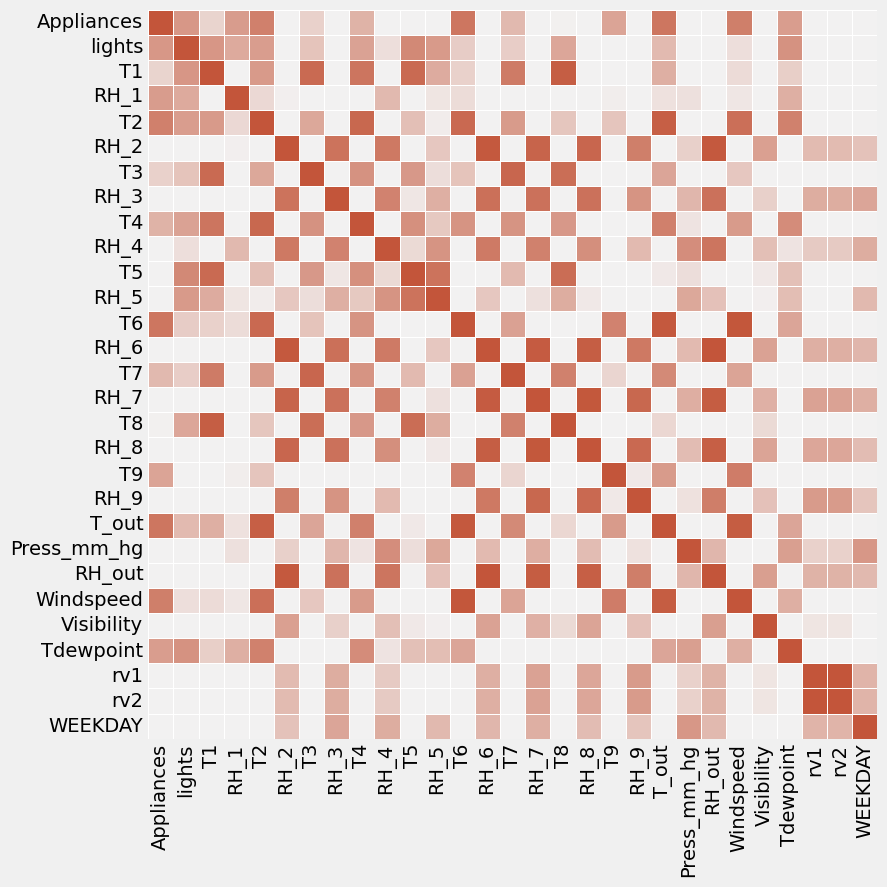

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap=cmap ,cbar=0, linewidths=0.5,vmax=1, vmin=0,center=0, square=True,cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'rv2')

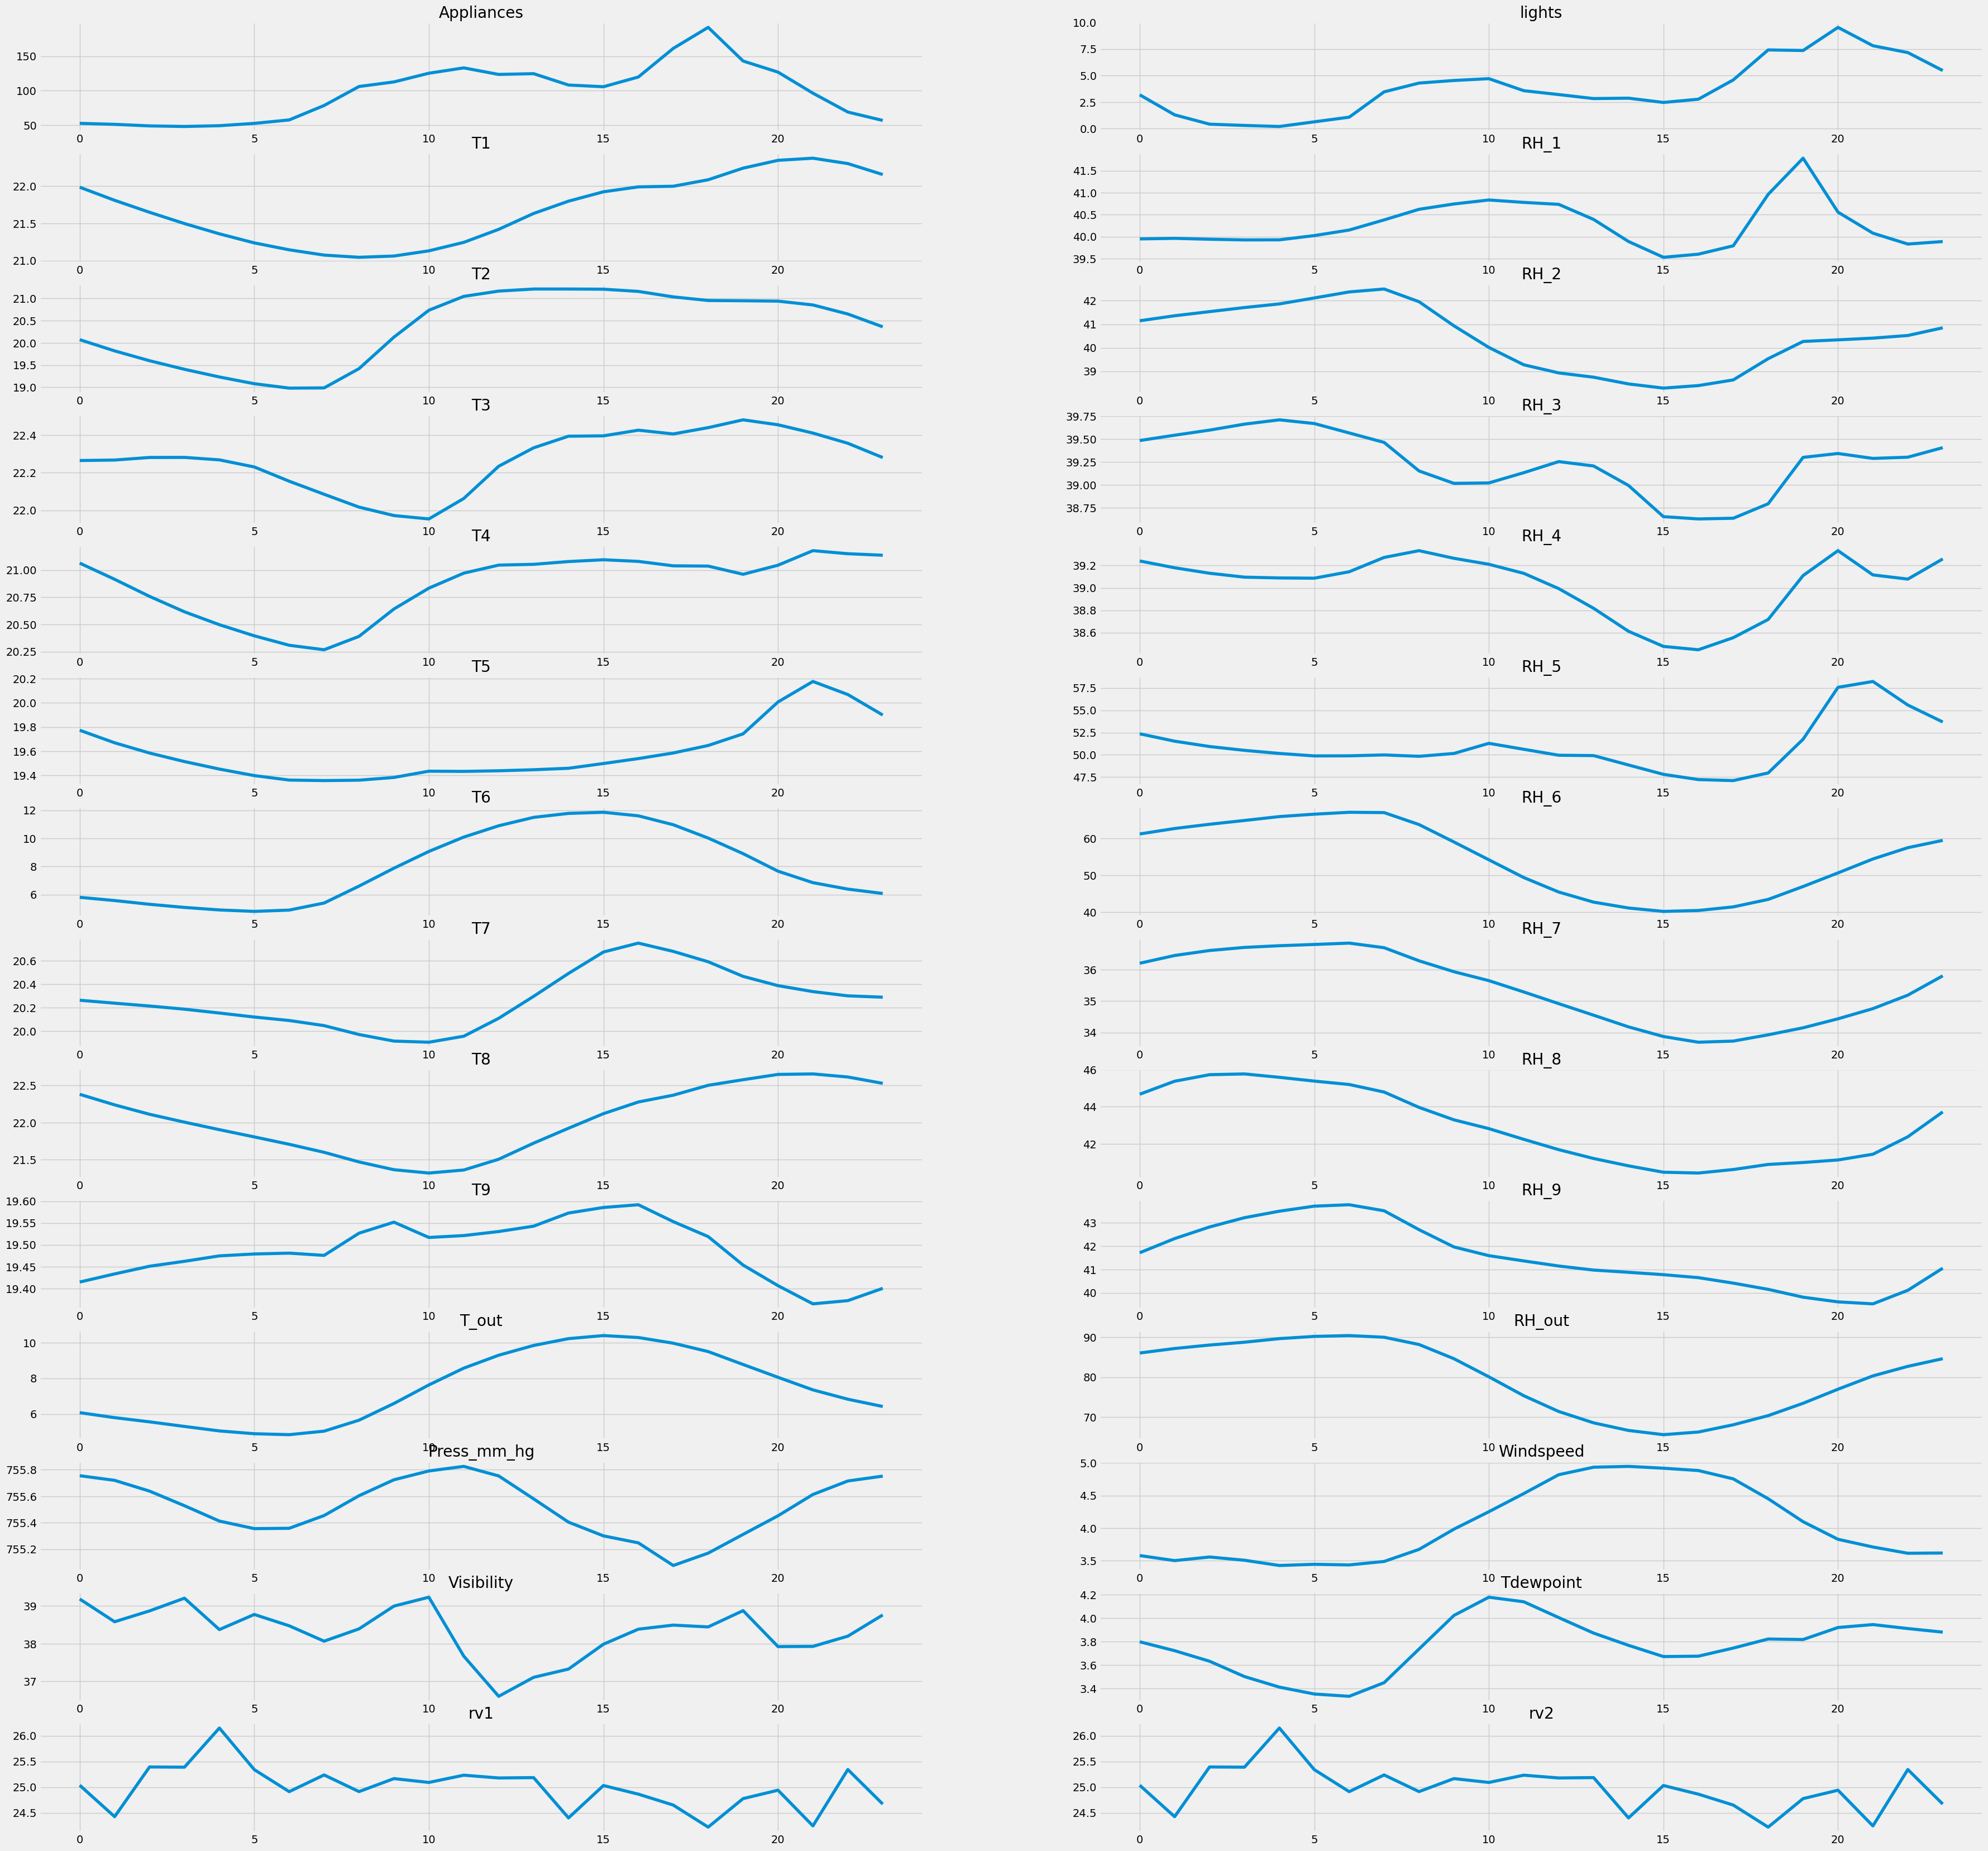

In [ ]:
fig, axs = plt.subplots(14, 2,figsize=(40, 40))
axs[0,0].plot(temp['Appliances'])
axs[0,0].set_title('Appliances')
axs[0,1].plot(temp['lights'],)
axs[0,1].set_title('lights')
axs[1,0].plot(temp['T1'])
axs[1,0].set_title('T1')
axs[1,1].plot(temp['RH_1'])
axs[1,1].set_title('RH_1')
axs[2,0].plot(temp['T2'])
axs[2,0].set_title('T2')
axs[2,1].plot(temp['RH_2'])
axs[2,1].set_title('RH_2')
axs[3,0].plot(temp['T3'])
axs[3,0].set_title('T3')
axs[3,1].plot(temp['RH_3'])
axs[3,1].set_title('RH_3')
axs[4,0].plot(temp['T4'])
axs[4,0].set_title('T4')
axs[4,1].plot(temp['RH_4'])
axs[4,1].set_title('RH_4')
axs[5,0].plot(temp['T5'])
axs[5,0].set_title('T5')
axs[5,1].plot(temp['RH_5'])
axs[5,1].set_title('RH_5')
axs[6,0].plot(temp['T6'])
axs[6,0].set_title('T6')
axs[6,1].plot(temp['RH_6'])
axs[6,1].set_title('RH_6')
axs[7,0].plot(temp['T7'])
axs[7,0].set_title('T7')
axs[7,1].plot(temp['RH_7'])
axs[7,1].set_title('RH_7')
axs[8,0].plot(temp['T8'])
axs[8,0].set_title('T8')
axs[8,1].plot(temp['RH_8'])
axs[8,1].set_title('RH_8')
axs[9,0].plot(temp['T9'])
axs[9,0].set_title('T9')
axs[9,1].plot(temp['RH_9'])
axs[9,1].set_title('RH_9')
axs[10,0].plot(temp['T_out'])
axs[10,0].set_title('T_out')
axs[10,1].plot(temp['RH_out'])
axs[10,1].set_title('RH_out')
axs[11,0].plot(temp['Press_mm_hg'])
axs[11,0].set_title('Press_mm_hg')
axs[11,1].plot(temp['Windspeed'])
axs[11,1].set_title('Windspeed')
axs[12,0].plot(temp['Visibility'])
axs[12,0].set_title('Visibility')
axs[12,1].plot(temp['Tdewpoint'])
axs[12,1].set_title('Tdewpoint')
axs[13,0].plot(temp['rv1'])
axs[13,0].set_title('rv1')
axs[13,1].plot(temp['rv2'])
axs[13,1].set_title('rv2')

Some statiscics of the data

In [ ]:
data.describe().T

count        mean        std         min         25%  \
Appliances   3290.0   97.779129  81.213695   28.333333   50.000000   
lights       3290.0    3.803445   6.900618    0.000000    0.000000   
T1           3290.0   21.687537   1.605960   16.790000   20.746250   
RH_1         3290.0   40.261345   3.942554   27.509167   37.355000   
T2           3290.0   20.342466   2.189660   16.100000   18.828472   
RH_2         3290.0   40.421067   4.053682   21.010000   37.914135   
T3           3290.0   22.268765   2.005313   17.245000   20.790000   
RH_3         3290.0   39.242985   3.244749   29.700556   36.887778   
T4           3290.0   20.856309   2.040943   15.100000   19.545799   
RH_4         3290.0   39.028661   4.336904   28.715571   35.520278   
T5           3290.0   19.593020   1.840764   15.347500   18.263435   
RH_5         3290.0   50.949599   8.633404   30.188611   45.479298   
T6           3290.0    7.914261   6.084127   -5.927685    3.620536   
RH_6         3290.0   54.595505  31.110830    1.000000   30.052500   
T7           3290.0   20.268179   2.110305   15.410370   18.713333   
RH_7         3290.0   35.390395   5.110314   23.340278   31.505762   
T8           3290.0   22.029792   1.955488   16.364074   20.786250   
RH_8         3290.0   42.937888   5.216124   29.738611   39.117869   
T9           3290.0   19.486769   2.014819   14.890000   18.022222   
RH_9         3290.0   41.553741   4.143581   29.218889   38.520694   
T_out        3290.0    7.415410   5.315858   -4.961111    3.666667   
Press_mm_hg  3290.0  755.522520   7.398575  729.383333  750.916667   
RH_out       3290.0   79.744656  14.830042   25.250000   70.416667   
Windspeed    3290.0    4.039742   2.430863    0.416667    2.000000   
Visibility   3290.0   38.327964  11.212175    1.000000   31.833333   
Tdewpoint    3290.0    3.763098   4.191967   -6.475000    0.933333   
rv1          3290.0   24.990346   5.943155    5.259551   20.755123   
rv2          3290.0   24.990346   5.943155    5.259551   20.755123   
hour         3290.0   11.503647   6.922725    0.000000    6.000000   

                    50%         75%         max  
Appliances    63.333333  110.000000  608.333333  
lights         0.000000    3.333333   51.666667  
T1            21.600000   22.633333   26.203333  
RH_1          39.655694   43.086181   53.980139  
T2            19.995556   21.506771   29.727778  
RH_2          40.495556   43.263750   53.914975  
T3            22.100000   23.308403   28.975286  
RH_3          38.540000   41.757083   49.472222  
T4            20.650556   22.100000   26.144762  
RH_4          38.412159   42.175556   50.747222  
T5            19.390000   20.629043   25.506389  
RH_5          49.222870   53.863718   94.884074  
T6             7.286944   11.224583   28.136619  
RH_6          55.144861   83.346944   99.900000  
T7            20.044444   21.611111   25.926667  
RH_7          34.920952   39.023102   51.191296  
T8            22.144361   23.378889   27.187778  
RH_8          42.355278   46.558681   58.707315  
T9            19.390000   20.600000   24.500000  
RH_9          40.861667   44.352024   53.140000  
T_out          6.916667   10.414583   25.933333  
Press_mm_hg  756.100000  760.931250  772.258333  
RH_out        83.666667   91.583333  100.000000  
Windspeed      3.583333    5.416667   13.000000  
Visibility    40.000000   40.000000   66.000000  
Tdewpoint      3.412500    6.566667   15.250000  
rv1           24.954809   29.100607   43.611051  
rv2           24.954809   29.100607   43.611051  
hour          12.000000   17.750000   23.000000

We can see that the temperature inside the house is around its mean(19-22°C) with a minimal variance, about 2°C, while the temparuture outside the building(T6,T_out) has a avarage of near 8°C and standard deviation of 6°C. The mean and standard deviation of temperature recorded from Chievres weather station(Tdewpoint) are 3.76°C and 4.19°C, respectively. This is because the data is collected from 11/01/2016 to 27/05/2016 which majority is in cool season in Chievres, Belgium. The similar trend can be seen for humidity. The humidity inside the building is about 40% with a small variance.
The mean and variance of humidity in the bathroom(RH_5) is a little bit larger than other rooms whereas this figure for humidity outside the house(RH_6, RH_out) is much larger. This can alse be explained by the above reason that, in this period, the climate in Chievres was very cold with rain and snow. Wind speed, Visibility and Pressure(press_mm_hg) can help us know more about the weather and geography properties of Chievres.


For more details, you can visit: https://weatherspark.com/y/49701/Average-Weather-in-Chi%C3%A8vres-Belgium-Year-Round#:~:text=The%20hottest%20month%20of%20the,high%20of%2042%C2%B0F.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

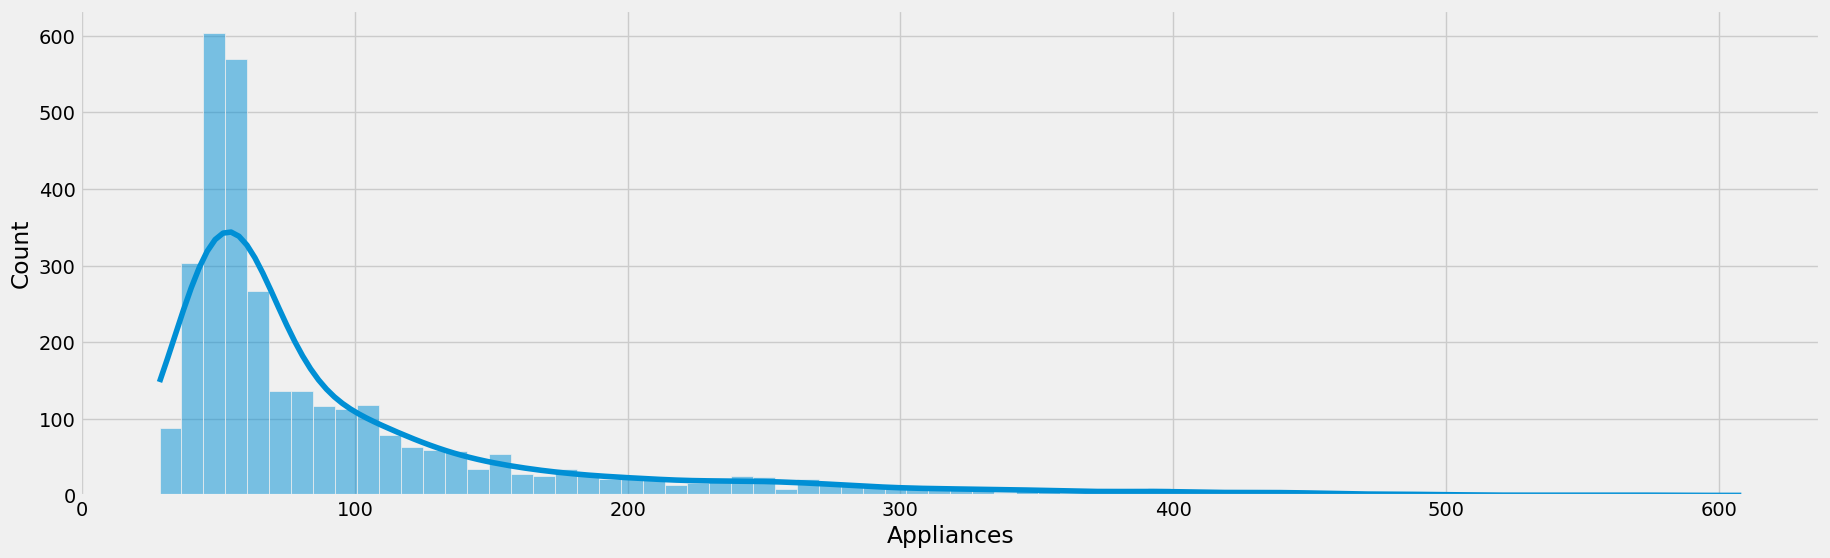

In [ ]:
sns.histplot(data['Appliances'], kde = True)
plt.plot

The above histogram is right skewed which explained why energy used has a considerable variance(mean is 97.7Wh and standard deviation is 102.5Wh) and a significant range(min is 10Wh while max is 1080Wh).

In [ ]:
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"]
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [ ]:
feature = data[col_temp + col_hum + col_weather + col_light ]

array([[<Axes: title={'center': 'T1'}>, <Axes: title={'center': 'T2'}>,
        <Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4'}>,
        <Axes: title={'center': 'T5'}>],
       [<Axes: title={'center': 'T6'}>, <Axes: title={'center': 'T7'}>,
        <Axes: title={'center': 'T8'}>, <Axes: title={'center': 'T9'}>,
        <Axes: title={'center': 'RH_1'}>],
       [<Axes: title={'center': 'RH_2'}>,
        <Axes: title={'center': 'RH_3'}>,
        <Axes: title={'center': 'RH_4'}>,
        <Axes: title={'center': 'RH_5'}>,
        <Axes: title={'center': 'RH_6'}>],
       [<Axes: title={'center': 'RH_7'}>,
        <Axes: title={'center': 'RH_8'}>,
        <Axes: title={'center': 'RH_9'}>,
        <Axes: title={'center': 'T_out'}>,
        <Axes: title={'center': 'Tdewpoint'}>],
       [<Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axes: title={'center': 'Visibility'}>,
        <Axe

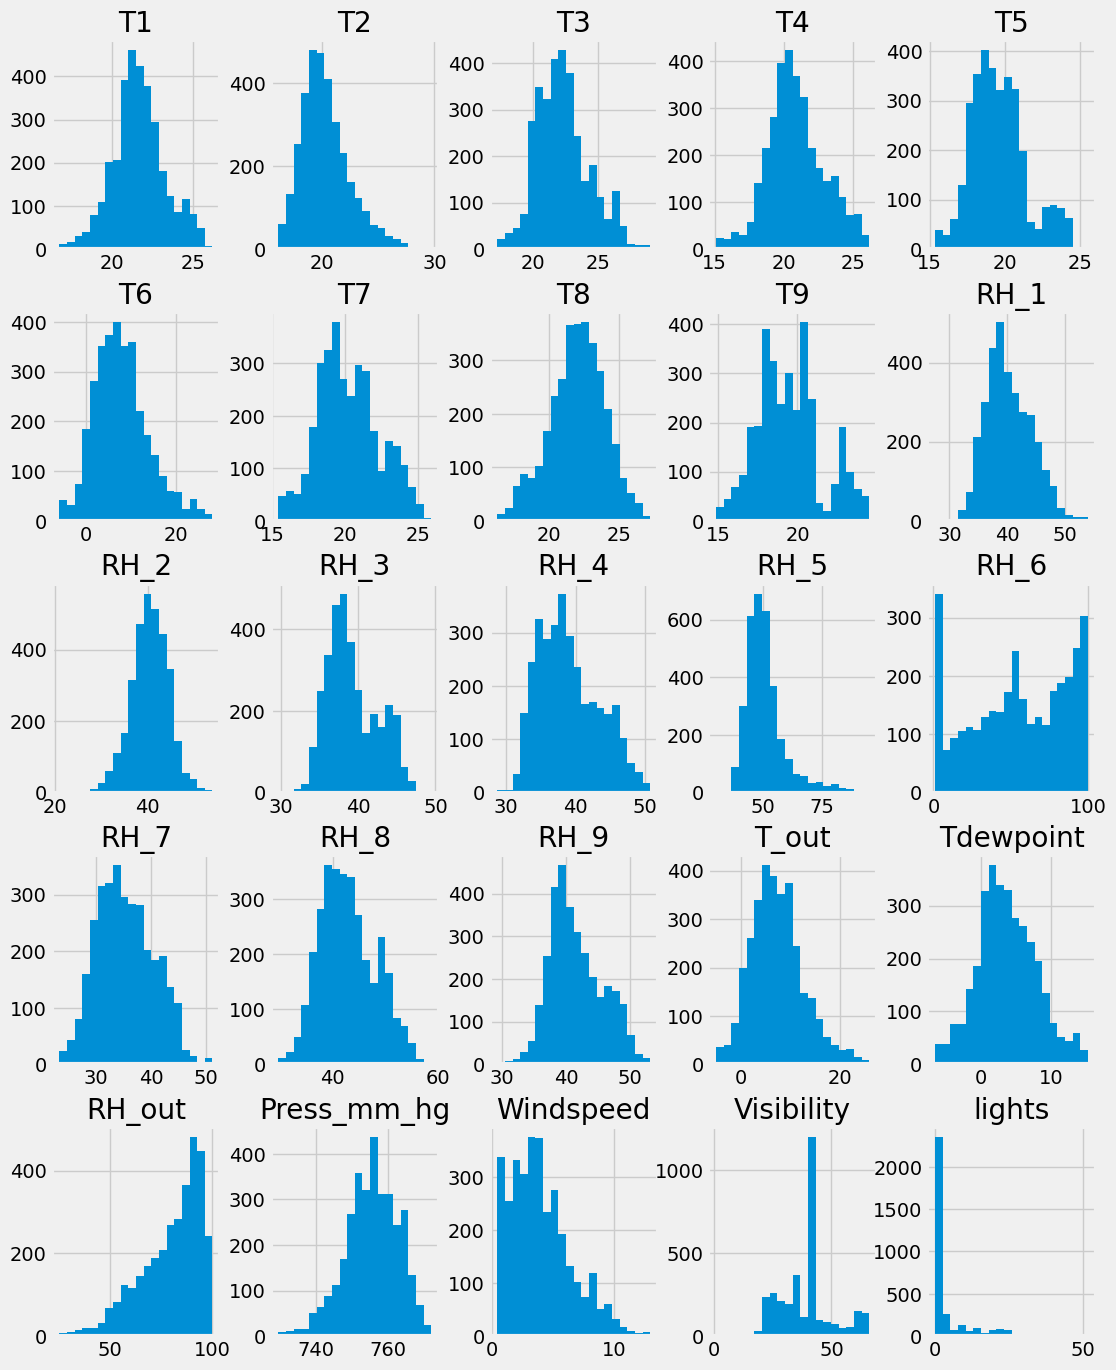

In [ ]:
feature.hist(bins = 20, figsize= (12,16))

Vizualize Data

Text(0.5, 1.0, 'rv2')

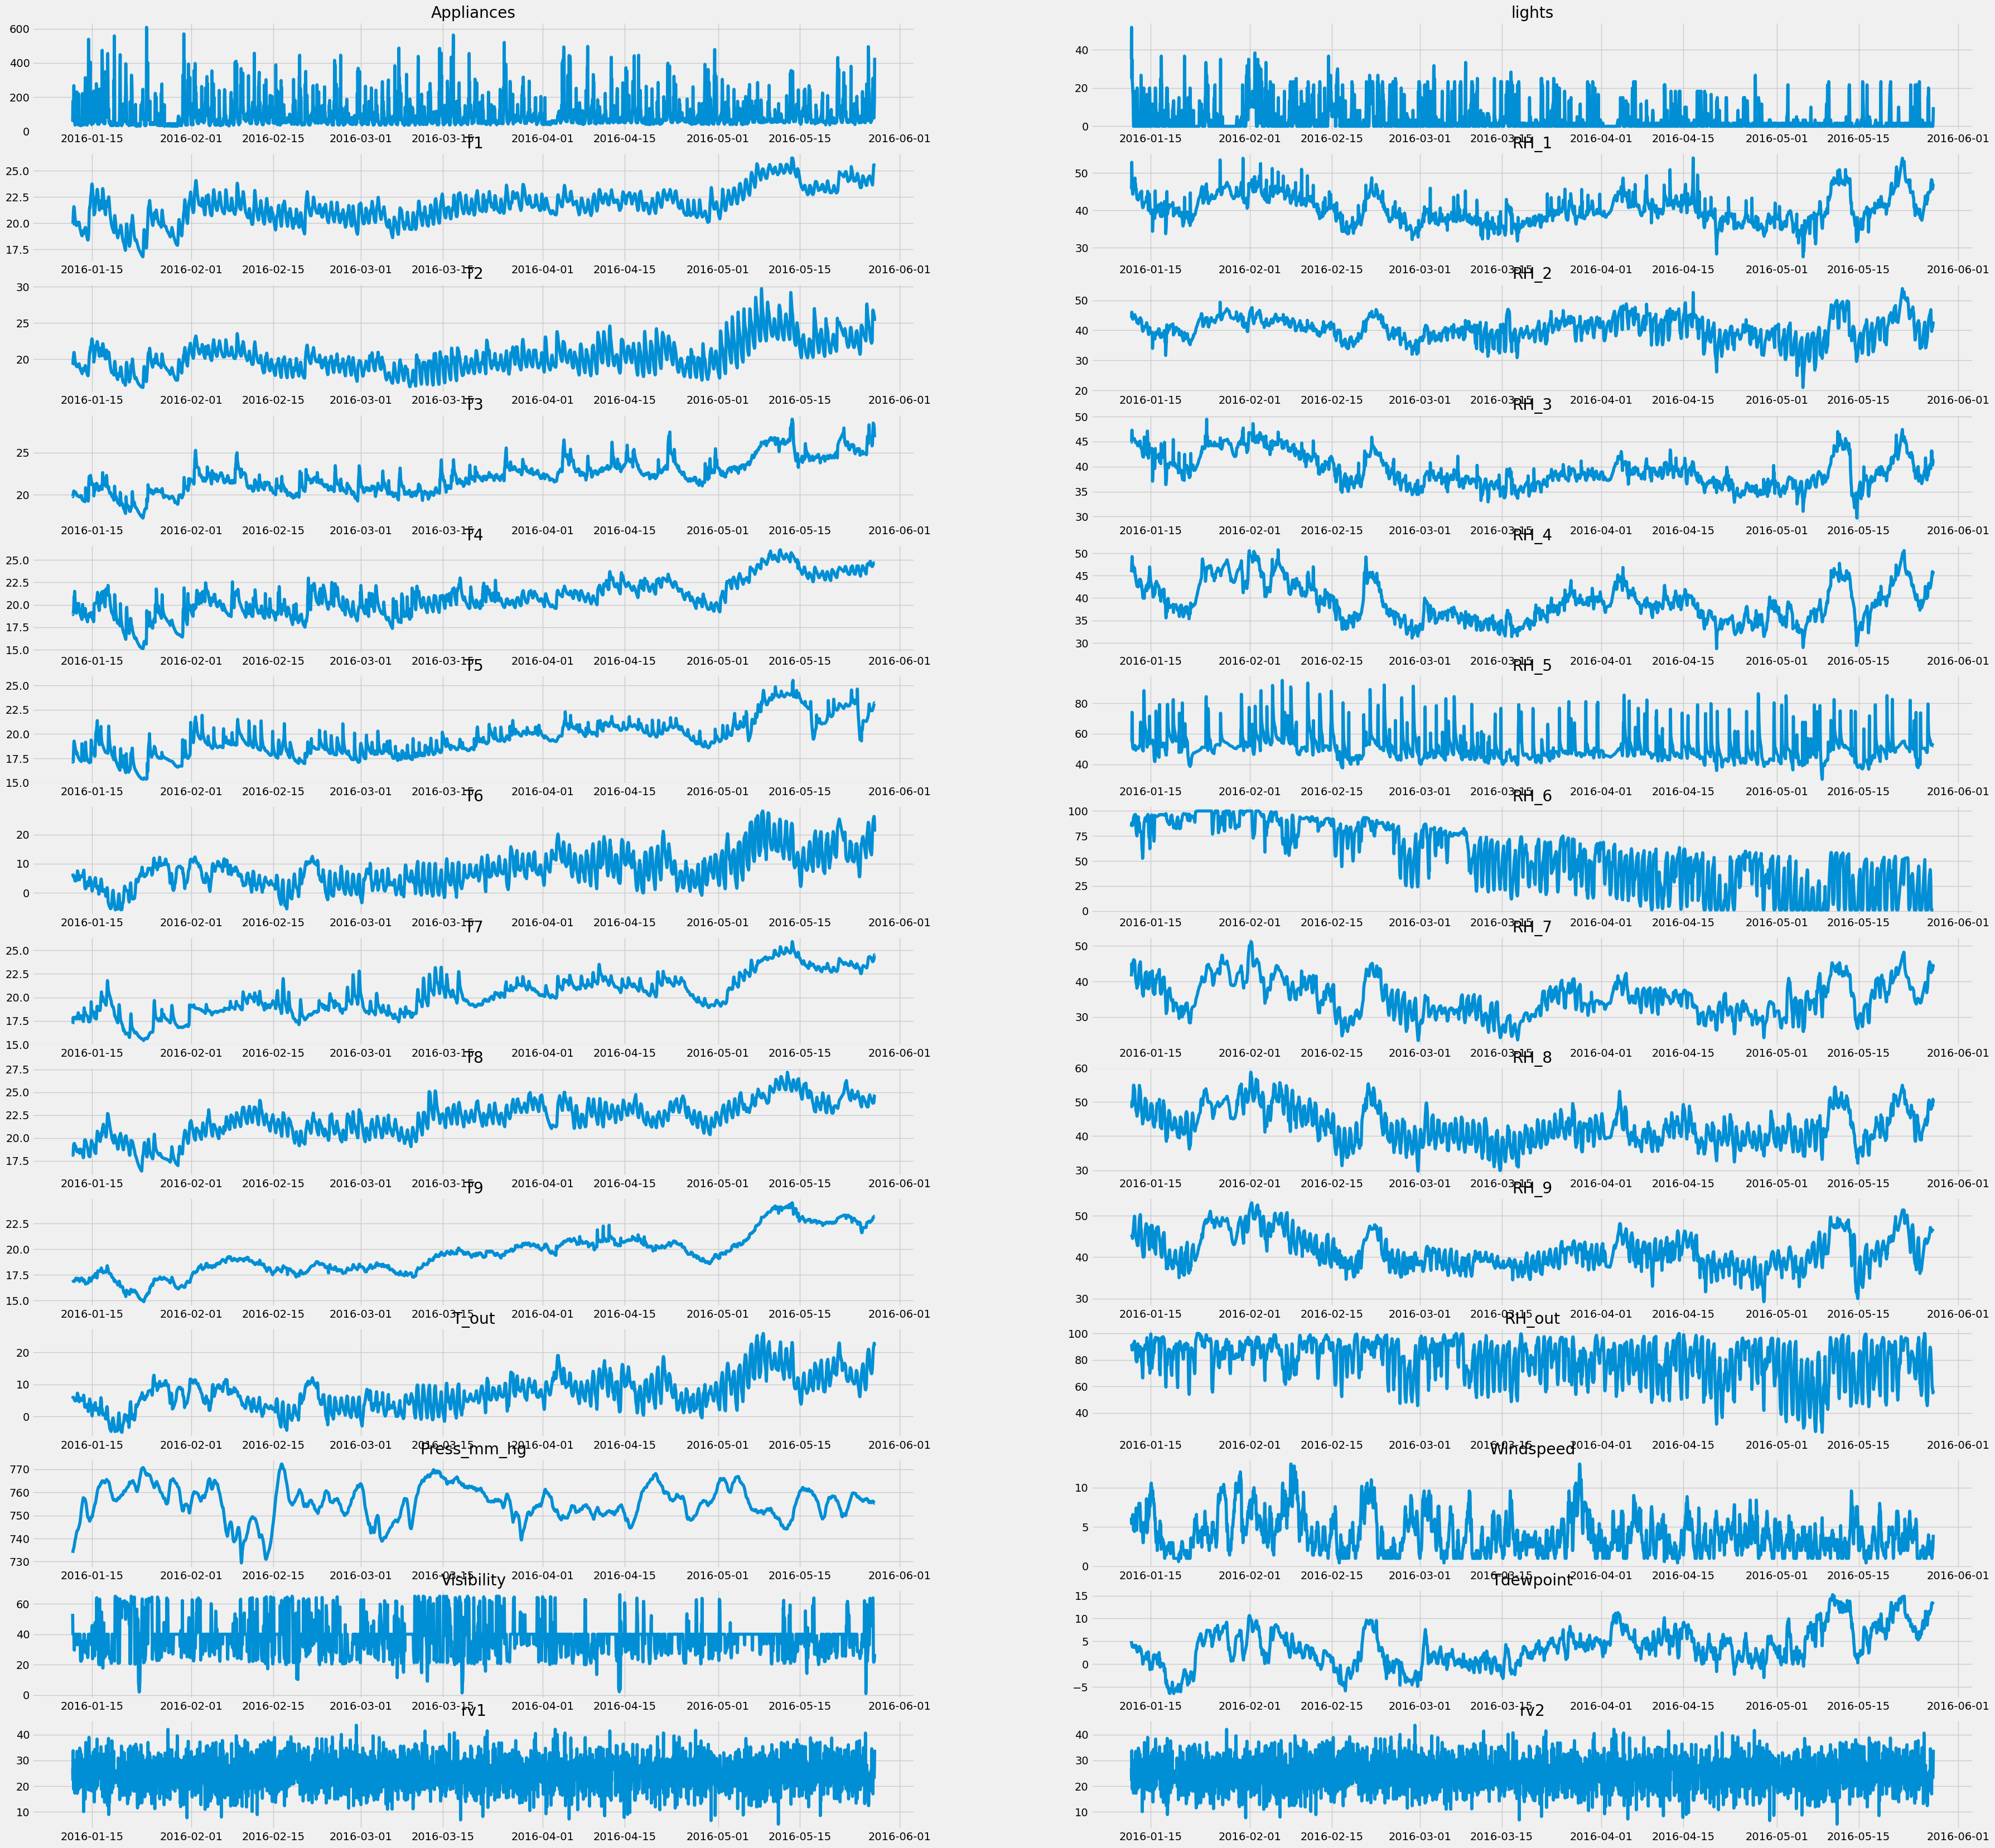

In [ ]:
fig, axs = plt.subplots(14, 2,figsize=(40, 40))
axs[0,0].plot(data['Appliances'])
axs[0,0].set_title('Appliances')
axs[0,1].plot(data['lights'],)
axs[0,1].set_title('lights')
axs[1,0].plot(data['T1'])
axs[1,0].set_title('T1')
axs[1,1].plot(data['RH_1'])
axs[1,1].set_title('RH_1')
axs[2,0].plot(data['T2'])
axs[2,0].set_title('T2')
axs[2,1].plot(data['RH_2'])
axs[2,1].set_title('RH_2')
axs[3,0].plot(data['T3'])
axs[3,0].set_title('T3')
axs[3,1].plot(data['RH_3'])
axs[3,1].set_title('RH_3')
axs[4,0].plot(data['T4'])
axs[4,0].set_title('T4')
axs[4,1].plot(data['RH_4'])
axs[4,1].set_title('RH_4')
axs[5,0].plot(data['T5'])
axs[5,0].set_title('T5')
axs[5,1].plot(data['RH_5'])
axs[5,1].set_title('RH_5')
axs[6,0].plot(data['T6'])
axs[6,0].set_title('T6')
axs[6,1].plot(data['RH_6'])
axs[6,1].set_title('RH_6')
axs[7,0].plot(data['T7'])
axs[7,0].set_title('T7')
axs[7,1].plot(data['RH_7'])
axs[7,1].set_title('RH_7')
axs[8,0].plot(data['T8'])
axs[8,0].set_title('T8')
axs[8,1].plot(data['RH_8'])
axs[8,1].set_title('RH_8')
axs[9,0].plot(data['T9'])
axs[9,0].set_title('T9')
axs[9,1].plot(data['RH_9'])
axs[9,1].set_title('RH_9')
axs[10,0].plot(data['T_out'])
axs[10,0].set_title('T_out')
axs[10,1].plot(data['RH_out'])
axs[10,1].set_title('RH_out')
axs[11,0].plot(data['Press_mm_hg'])
axs[11,0].set_title('Press_mm_hg')
axs[11,1].plot(data['Windspeed'])
axs[11,1].set_title('Windspeed')
axs[12,0].plot(data['Visibility'])
axs[12,0].set_title('Visibility')
axs[12,1].plot(data['Tdewpoint'])
axs[12,1].set_title('Tdewpoint')
axs[13,0].plot(data['rv1'])
axs[13,0].set_title('rv1')
axs[13,1].plot(data['rv2'])
axs[13,1].set_title('rv2')


In [ ]:
corr = data.corr()
corr

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.261794  0.074464  0.124464  0.155150 -0.068758   
lights         0.261794  1.000000 -0.026813  0.126733 -0.005890  0.059116   
T1             0.074464 -0.026813  1.000000  0.165936  0.838470 -0.002162   
RH_1           0.124464  0.126733  0.165936  1.000000  0.273126  0.802405   
T2             0.155150 -0.005890  0.838470  0.273126  1.000000 -0.163754   
RH_2          -0.068758  0.059116 -0.002162  0.802405 -0.163754  1.000000   
T3             0.116838 -0.111662  0.893731  0.256216  0.737472  0.138189   
RH_3           0.053693  0.151652 -0.028615  0.853102  0.122056  0.681418   
T4             0.055205 -0.009062  0.878618  0.108033  0.764181 -0.046707   
RH_4           0.023247  0.131232  0.098747  0.889096  0.232799  0.724197   
T5             0.024828 -0.090437  0.887927  0.209452  0.723937  0.111617   
RH_5           0.002012  0.166671 -0.015936  0.321630  0.030567  0.263501   
T6             0.150774 -0.089949  0.656491  0.320266  0.802628 -0.007773   
RH_6          -0.107556  0.176334 -0.616571  0.246907 -0.581416  0.390135   
T7             0.034945 -0.154925  0.839550  0.022510  0.665601 -0.051116   
RH_7          -0.068052  0.041198  0.136569  0.809275  0.231033  0.693269   
T8             0.050736 -0.081881  0.826086 -0.029690  0.579899 -0.040915   
RH_8          -0.117791  0.016327 -0.005217  0.744227  0.070163  0.682758   
T9             0.014573 -0.180655  0.845884  0.117057  0.677538  0.055074   
RH_9          -0.061158 -0.008205  0.073044  0.772890  0.159187  0.679956   
T_out          0.127453 -0.085036  0.684409  0.345119  0.793928  0.035608   
Press_mm_hg   -0.044034 -0.012278 -0.150630 -0.296775 -0.133336 -0.256678   
RH_out        -0.194515  0.078925 -0.347438  0.277023 -0.507293  0.587301   
Windspeed      0.112477  0.069831 -0.088512  0.208679  0.052163  0.071092   
Visibility    -0.003380  0.023114 -0.080553 -0.023672 -0.074087 -0.005989   
Tdewpoint      0.021073 -0.041437  0.573135  0.645987  0.584871  0.501625   
rv1           -0.022951  0.005734 -0.014101 -0.003107 -0.026987  0.014371   
rv2           -0.022951  0.005734 -0.014101 -0.003107 -0.026987  0.014371   
hour           0.274622  0.293839  0.179414  0.019148  0.255676 -0.183882   

                   T3      RH_3        T4      RH_4  ...      RH_9     T_out  \
Appliances   0.116838  0.053693  0.055205  0.023247  ... -0.061158  0.127453   
lights      -0.111662  0.151652 -0.009062  0.131232  ... -0.008205 -0.085036   
T1           0.893731 -0.028615  0.878618  0.098747  ...  0.073044  0.684409   
RH_1         0.256216  0.853102  0.108033  0.889096  ...  0.772890  0.345119   
T2           0.737472  0.122056  0.764181  0.232799  ...  0.159187  0.793928   
RH_2         0.138189  0.681418 -0.046707  0.724197  ...  0.679956  0.035608   
T3           1.000000 -0.012625  0.854894  0.123753  ...  0.135662  0.701313   
RH_3        -0.012625  1.000000 -0.140727  0.902182  ...  0.837462  0.119194   
T4           0.854894 -0.140727  1.000000 -0.048021  ... -0.024714  0.665270   
RH_4         0.123753  0.902182 -0.048021  1.000000  ...  0.859285  0.294912   
T5           0.891344 -0.049953  0.875177  0.092896  ...  0.073553  0.654145   
RH_5        -0.069731  0.392949 -0.080385  0.368645  ...  0.285591 -0.055457   
T6           0.688900  0.077650  0.654267  0.260477  ...  0.186070  0.975855   
RH_6        -0.649519  0.516785 -0.705164  0.392180  ...  0.392232 -0.642590   
T7           0.848598 -0.250476  0.879343 -0.130452  ... -0.077305  0.632520   
RH_7         0.173869  0.835598  0.044565  0.895941  ...  0.860611  0.296213   
T8           0.796518 -0.284024  0.797825 -0.166745  ... -0.156600  0.504028   
RH_8         0.045370  0.832368 -0.094510  0.849426  ...  0.857796  0.118983   
T9           0.902650 -0.195533  0.891109 -0.043846  ... -0.008056  0.669520   
RH_9         0.135662  0.837462 -0.024714  0.859285  ...  1.000000  0.225132   
T_out        0.701313 

<Axes: >

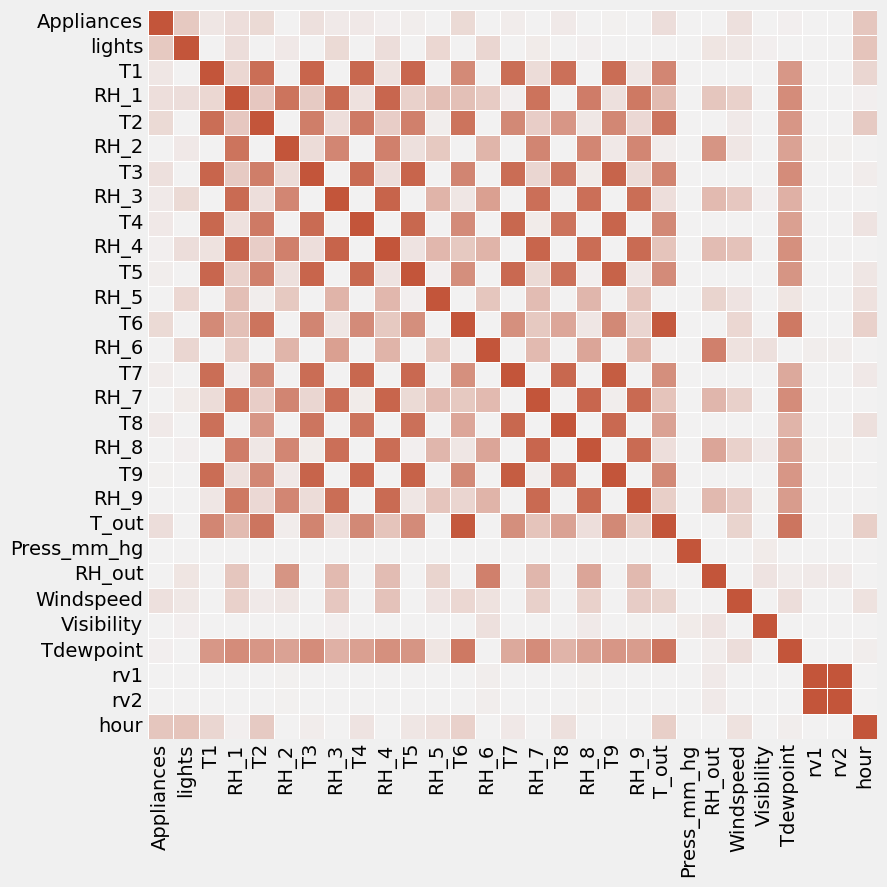

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap ,cbar=0, linewidths=0.5,vmax=1, vmin=0,center=0, square=True,cbar_kws={"shrink": .5})


As can be seen from the plots of attributes and the heatmap, the temparature and humidity of rooms in the house is similar and similiar to the temperature recorded from Chievres weather station(Tdewpoint).

## Predict energy used by appliances

Test for stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Appliances'],autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.948888
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


p-value is approximately 0, so we can conclude that the time series is stationary. Therefore, we can use some models to predict the enegry used time series.

Fisrt, we need to test for some properties of the time series.

1. Seasonal Decompose

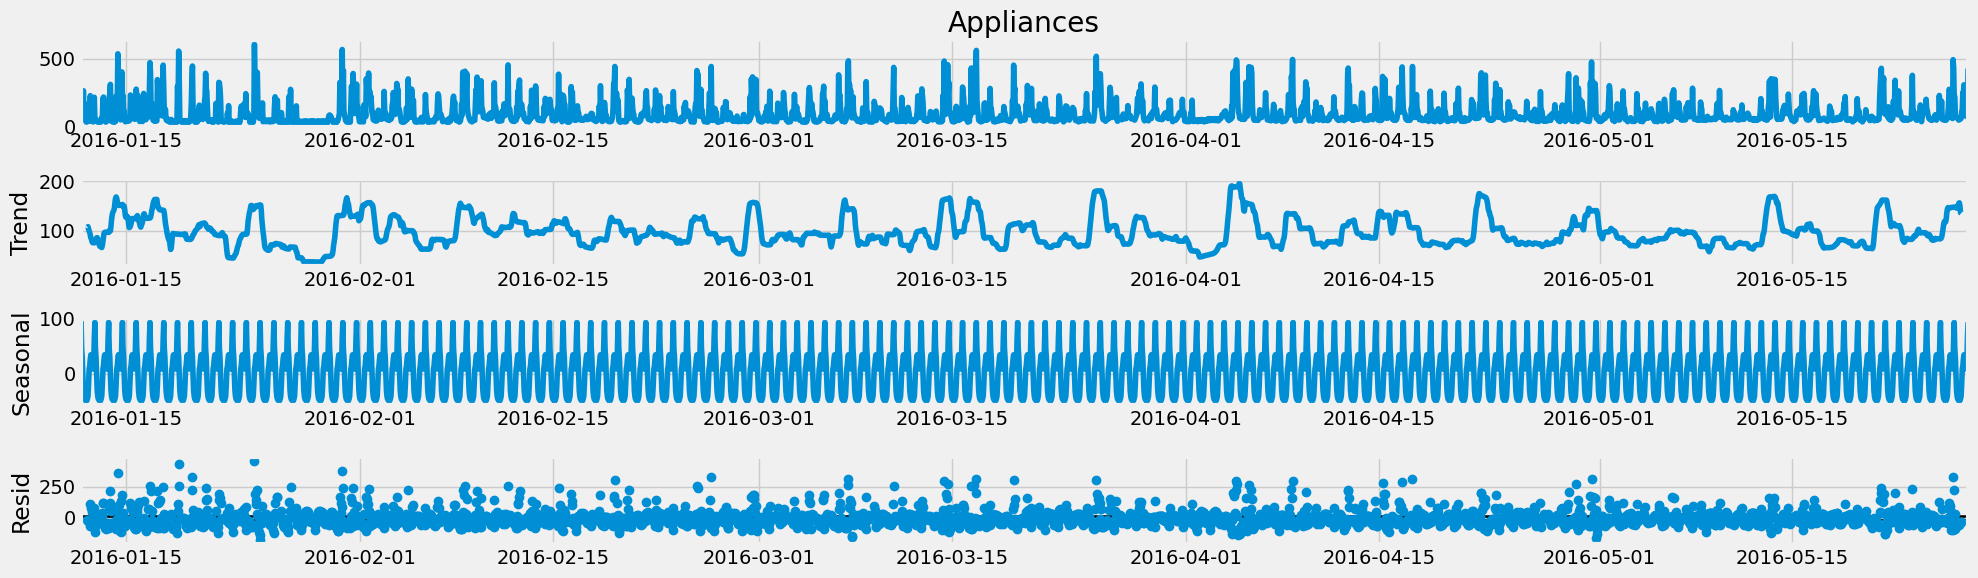

In [ ]:
result = seasonal_decompose(data["Appliances"], model='additive',period=24)
result.plot()
plt.show()

When we choose 24 is the period of this time series, the seasonal component is completely periodic.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


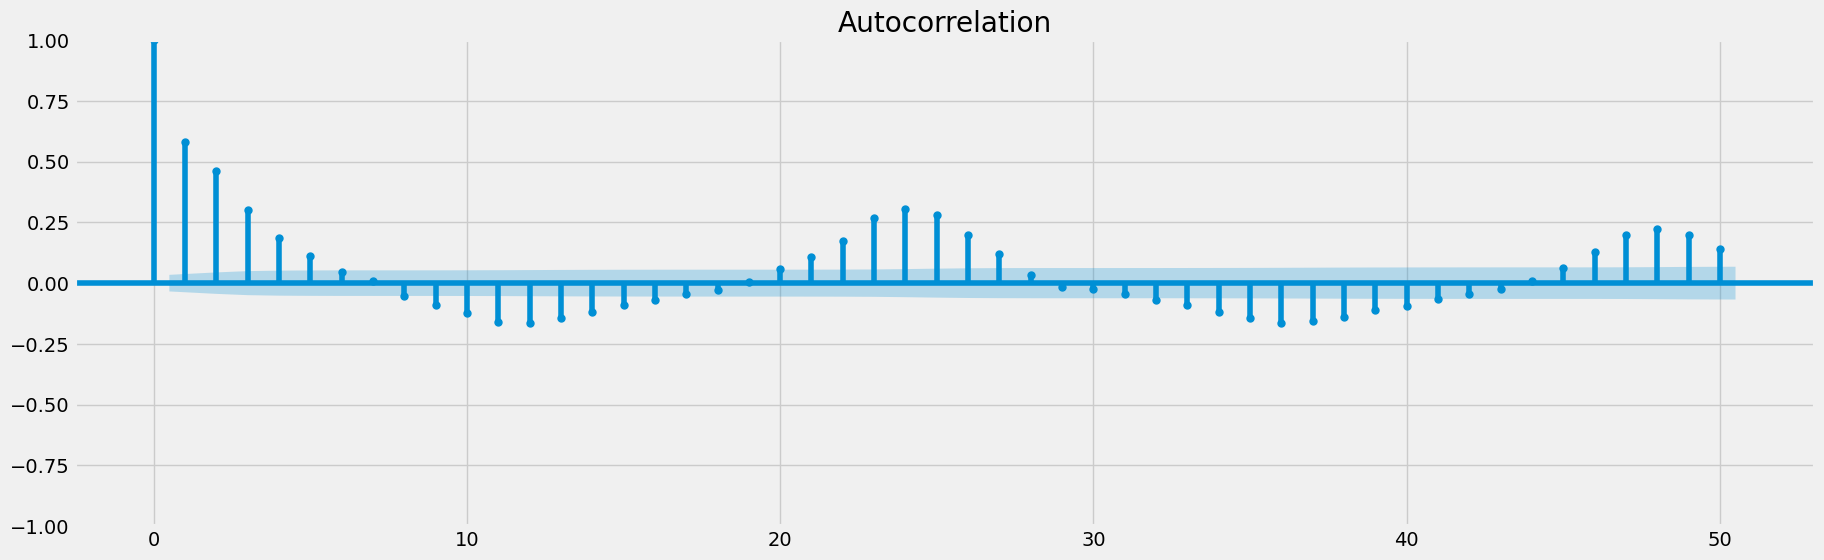

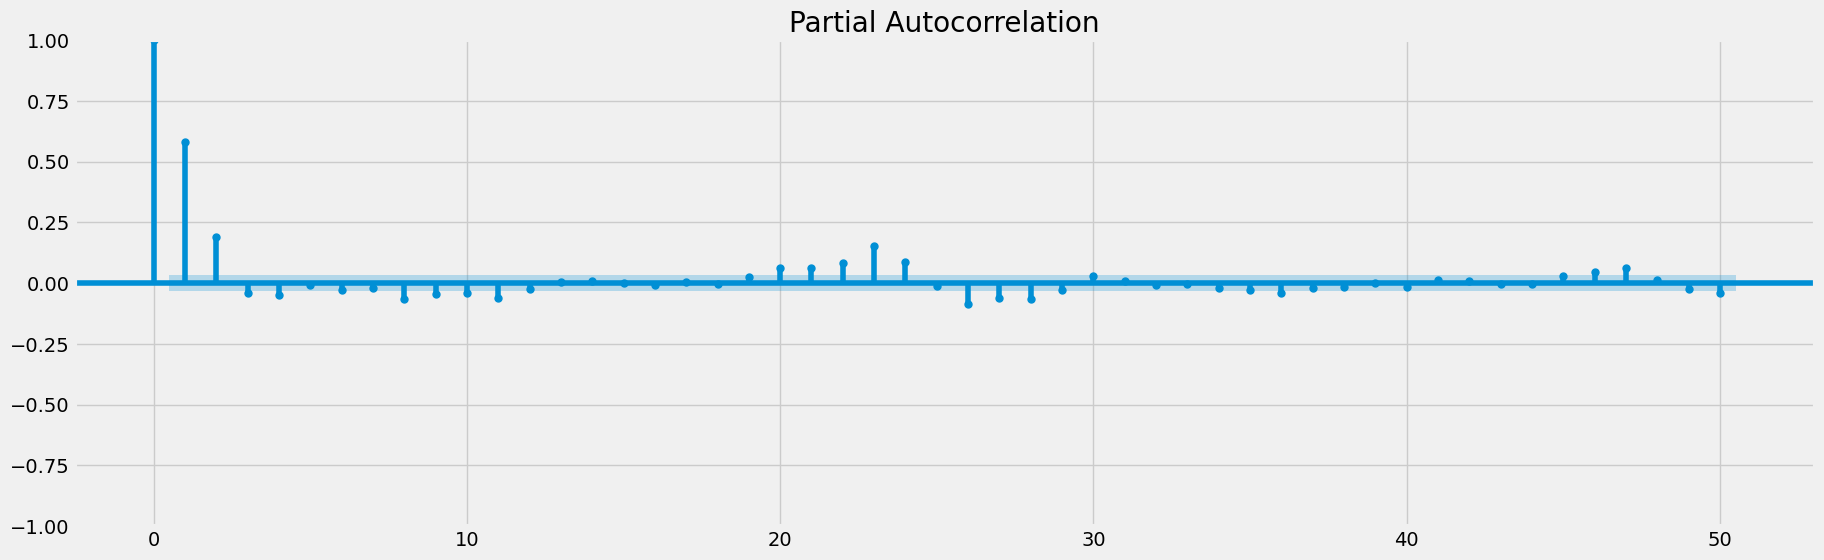

In [ ]:

plot_acf(data["Appliances"],lags=50)
plot_pacf(data["Appliances"],lags=50)
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Linear Model

In [ ]:
#creating the train and validation set
train = data[data.columns[:-2]][:len(data)-100]
valid = data[data.columns[:-2]][len(data)-100:]


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
OLS=LinearRegression().fit(X=train[data.columns[1:-2]],y=train['Appliances'])
OLS_pred= OLS.predict(valid[data.columns[1:-2]])
OLS_pred=pd.Series(OLS_pred,index=valid.index)

Ridge=Ridge(alpha=0.001).fit(X=train[data.columns[1:-2]],y=train['Appliances'])
Ridge_pred= Ridge.predict(valid[data.columns[1:-2]])
Ridge_pred=pd.Series(Ridge_pred,index=valid.index)

Lasso=Lasso(alpha=0.03).fit(X=train[data.columns[1:-2]],y=train['Appliances'])
Lasso_pred= Lasso.predict(valid[data.columns[1:-2]])
Lasso_pred=pd.Series(Lasso_pred,index=valid.index)

In [ ]:
OLS_rmse=math.sqrt(mean_squared_error(OLS_pred,valid['Appliances']))
Ridge_rmse=math.sqrt(mean_squared_error(Ridge_pred,valid['Appliances']))
Lasso_rmse=math.sqrt(mean_squared_error(Lasso_pred,valid['Appliances']))
OLS_mae=mean_absolute_error(OLS_pred,valid['Appliances'])
Ridge_mae=mean_absolute_error(Ridge_pred,valid['Appliances'])
Lasso_mae=mean_absolute_error(Lasso_pred,valid['Appliances'])
print(OLS_rmse,OLS_mae)
print(Ridge_rmse,Ridge_mae)
print(Lasso_rmse,Lasso_mae)

78.22267515147364 53.00132364928036
78.2226748038384 53.00131331785337
78.1943227757854 52.9139645077469


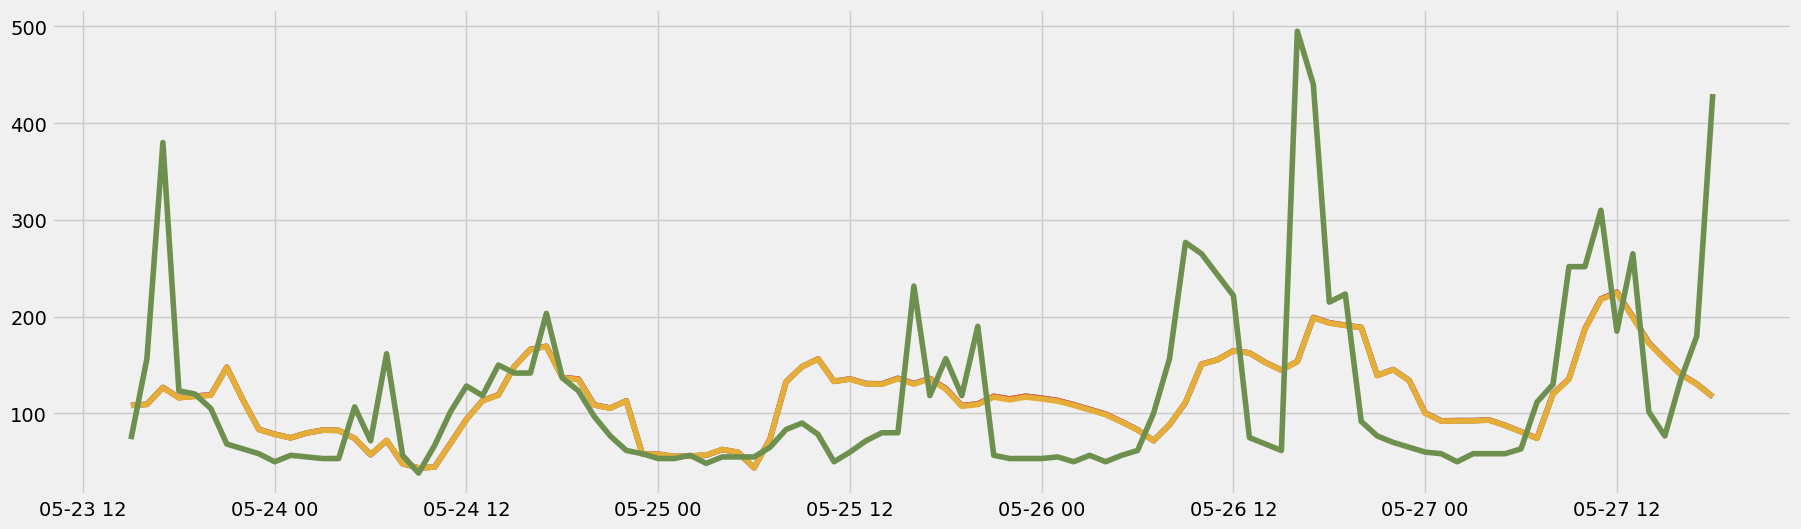

In [ ]:
plt.plot(OLS_pred)
plt.plot(Ridge_pred)
plt.plot(Lasso_pred)
plt.plot(valid['Appliances'])
plt.show()

## Seasonal AR Model

In [ ]:
#creating the train and validation set
train = data['Appliances'][:len(data)-100]
valid = data['Appliances'][len(data)-100:]

                            AutoReg Model Results                             
Dep. Variable:             Appliances   No. Observations:                 3190
Model:               Seas. AutoReg(4)   Log Likelihood              -17566.339
Method:               Conditional MLE   S.D. of innovations             60.019
Date:                Sat, 15 Jul 2023   AIC                          35190.678
Time:                        17:06:24   BIC                          35366.607
Sample:                    01-11-2016   HQIC                         35253.766
                         - 05-23-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            90.7914      5.723     15.865      0.000      79.575     102.008
s(2,24)          14.6467      7.430      1.971      0.049       0.084      29.209
s(3,24)         -55.7775      7.521     

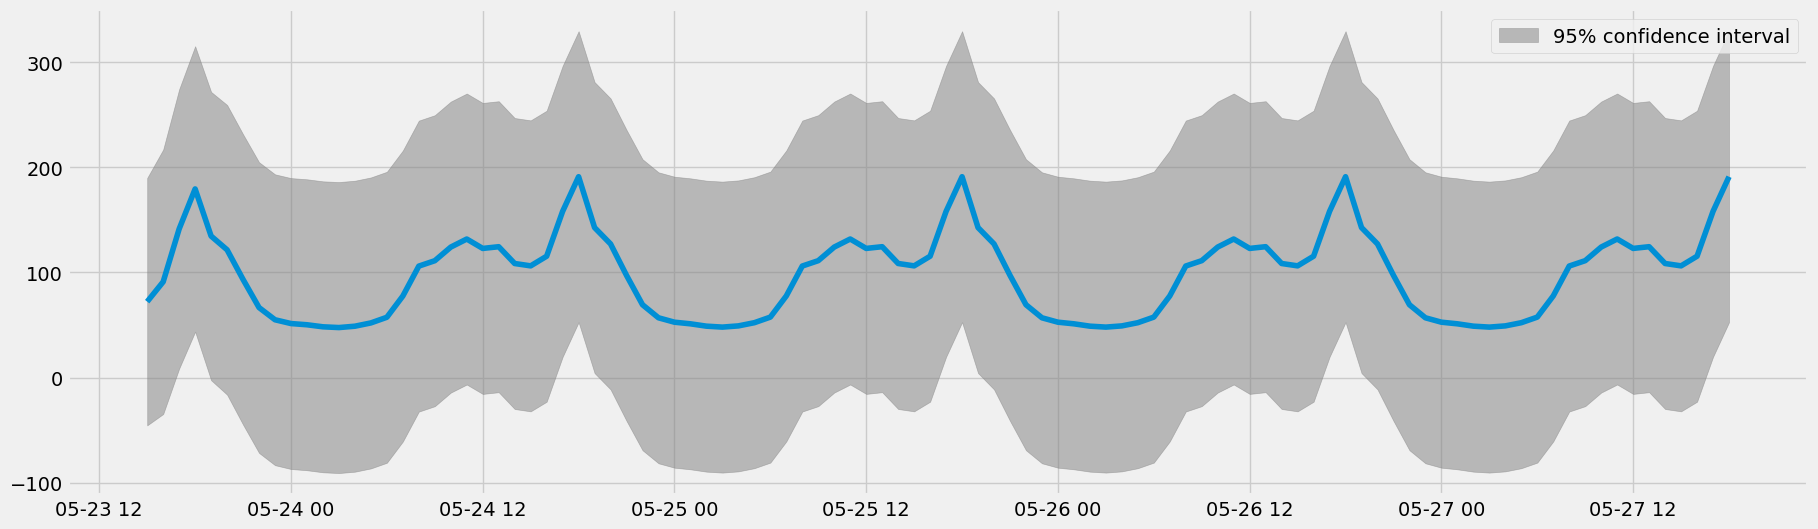

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
model = AutoReg(train, lags = 4,seasonal=True,period=24)
res= model.fit()
# sel = ar_select_order(train, 1,seasonal=True,period=144, old_names=False)
# sel.ar_lags
# res = sel.model.fit()
print(res.summary())
pred=res.predict(start=len(train), end=len(data)-1)

res.plot_predict(start=len(train), end=len(data)-1)
plt.show()

[]

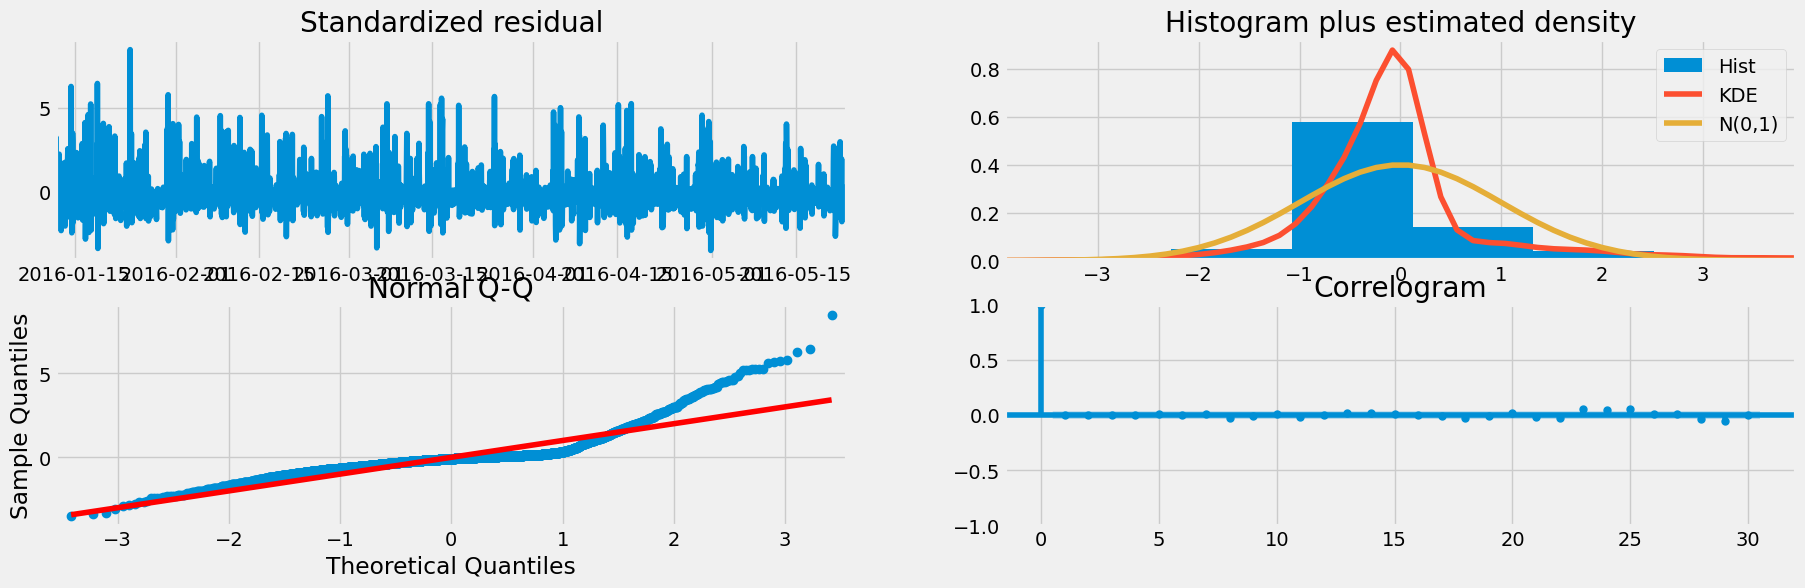

In [ ]:
res.plot_diagnostics(lags=30)
plt.plot()

In [ ]:
rmse=math.sqrt(mean_squared_error(pred,valid))
mae=mean_absolute_error(pred,valid)
print(rmse, mae)

77.62738652221412 44.67840219161689


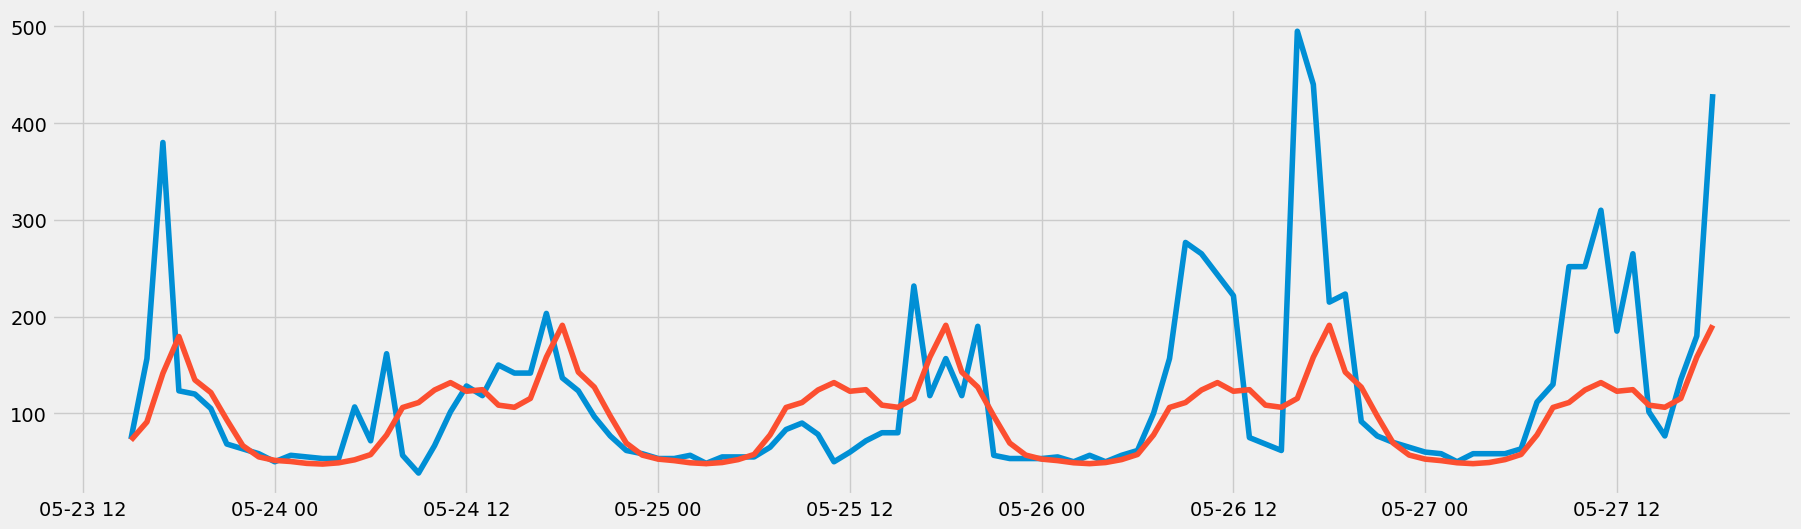

In [ ]:
plt.plot(valid)
plt.plot(pred)

## Seasonal ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(train, seasonal_order=(4,0,1,24))
res = mod.fit()

pred=res.predict(start=len(train), end=len(data)-1)

In [ ]:
rmse=math.sqrt(mean_squared_error(pred,valid))
mae=mean_absolute_error(pred,valid)
print(rmse, mae)

76.68403383306462 41.416713804281265


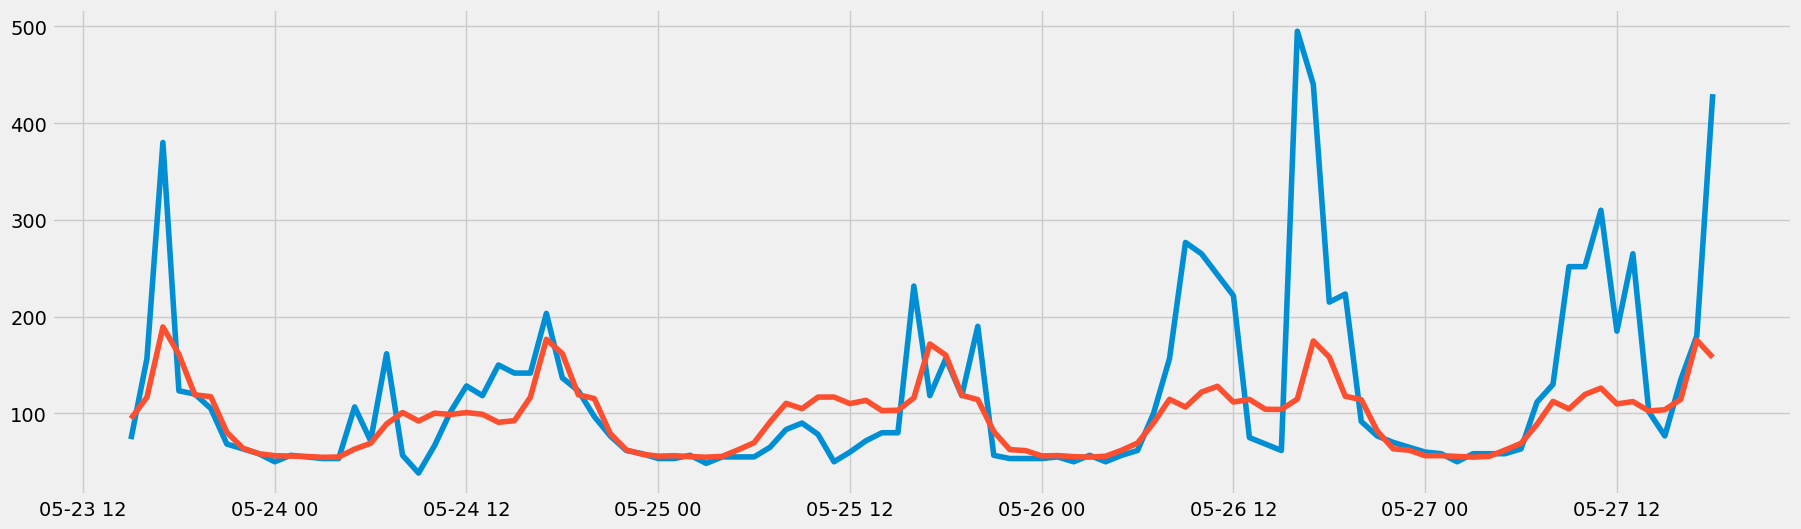

In [ ]:
plt.plot(valid)
plt.plot(pred)

## VAR model

### Test for stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
# r_t = np.log(df['Appliances']/df['Appliances'].shift(1))
# mean = np.nanmean(r_t)
# r_t[0]=mean
non_stationary=[]
for timeseries in data.columns[1:-2]:
	result = adfuller(data[timeseries],autolag='AIC')
	print('ADF Statistic: %f' % result[0])
	print('p-value: %f' % result[1])
	# print('Critical Values:')
	# for key, value in result[4].items():
	# 	print('\t%s: %.3f' % (key, value))
	if result[1]<0.01:
		print(timeseries+' is stationary')
	else:
		print(timeseries+' is not stationary')
		non_stationary.append(timeseries)

ADF Statistic: -7.114023
p-value: 0.000000
lights is stationary
ADF Statistic: -2.797807
p-value: 0.058588
T1 is not stationary
ADF Statistic: -4.365762
p-value: 0.000341
RH_1 is stationary
ADF Statistic: -2.813755
p-value: 0.056336
T2 is not stationary
ADF Statistic: -5.197125
p-value: 0.000009
RH_2 is stationary
ADF Statistic: -2.471099
p-value: 0.122666
T3 is not stationary
ADF Statistic: -3.813558
p-value: 0.002772
RH_3 is stationary
ADF Statistic: -2.273381
p-value: 0.180697
T4 is not stationary
ADF Statistic: -3.813542
p-value: 0.002772
RH_4 is stationary
ADF Statistic: -2.327208
p-value: 0.163343
T5 is not stationary
ADF Statistic: -7.503648
p-value: 0.000000
RH_5 is stationary
ADF Statistic: -3.635793
p-value: 0.005112
T6 is stationary
ADF Statistic: -2.273462
p-value: 0.180670
RH_6 is not stationary
ADF Statistic: -1.827690
p-value: 0.366803
T7 is not stationary
ADF Statistic: -4.483708
p-value: 0.000210
RH_7 is stationary
ADF Statistic: -2.928576
p-value: 0.042124
T8 is not s

In [ ]:
non_stationary

['T1', 'T2', 'T3', 'T4', 'T5', 'RH_6', 'T7', 'T8', 'T9', 'T_out']

We test for stationary at 99% of significant level. As can see from the result, except for T6 and Tdewpoint, we can conclude that other temperature series are not stationary. Moreover, RH_6(Humidity out side the buliding) is also not stationary.

We take fisrt difference for these non-stationary time series

In [ ]:
for timeseries in non_stationary:
	temp=data[timeseries].diff(1)
	temp[0]=temp.mean()
	result = adfuller(temp,autolag='AIC')
	print(timeseries)
	print('ADF Statistic: %f' % result[0])
	print('p-value: %f' % result[1])
	print('Critical Values:')
	for key, value in result[4].items():
		print('\t%s: %.3f' % (key, value))
	if result[1]<0.01:
		data[timeseries]=temp

T1
ADF Statistic: -10.250191
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T2
ADF Statistic: -12.452979
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T3
ADF Statistic: -12.517885
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T4
ADF Statistic: -12.605574
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T5
ADF Statistic: -12.327679
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
RH_6
ADF Statistic: -13.836138
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T7
ADF Statistic: -11.606743
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T8
ADF Statistic: -11.855249
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T9
ADF Statistic: -8.532569
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
T_out
ADF Statistic: -11.350787
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862

After differencing, these time series become stationary

In [ ]:
train = data[data.columns[:-2]][:len(data)-100]
valid = data[data.columns[:-2]][len(data)-100:]

In [ ]:
from statsmodels.tsa.api import VAR
model = VAR(train)
x=model.select_order(maxlags=12)
x.summary()
# model_fit=model.fit(5)
# prediction = model_fit.forecast(valid.values, steps=len(valid))


<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
model_fit=model.fit(5)
prediction = model_fit.forecast(valid.values, steps=len(valid))

In [ ]:
pred=pd.DataFrame(prediction, index = valid.index,columns=valid.columns)

In [ ]:
for timeseries in train.columns:
  print('RMSE for '+timeseries+': '+str(math.sqrt(mean_squared_error(pred[timeseries],valid[timeseries]))))
  print('MAE for '+timeseries+': '+str(mean_absolute_error(pred[timeseries],valid[timeseries])))

RMSE for Appliances: 92.82297836277847
MAE for Appliances: 61.14020483170573
RMSE for lights: 6.609172302303462
MAE for lights: 4.824687979282094
RMSE for T1: 0.15033997036689767
MAE for T1: 0.10502446185885728
RMSE for RH_1: 3.827913682231878
MAE for RH_1: 3.225539836194746
RMSE for T2: 0.5476243664784624
MAE for T2: 0.32163787781235587
RMSE for RH_2: 4.96036889130429
MAE for RH_2: 3.9605787745248717
RMSE for T3: 0.30425455542499014
MAE for T3: 0.18820880028554168
RMSE for RH_3: 2.839492867938934
MAE for RH_3: 2.4040783128766323
RMSE for T4: 0.1318171310660449
MAE for T4: 0.10665935825059535
RMSE for RH_4: 3.186865948970248
MAE for RH_4: 2.7081369083981937
RMSE for T5: 0.2997359790758427
MAE for T5: 0.17826967756057624
RMSE for RH_5: 8.726754978439576
MAE for RH_5: 6.257082249604847
RMSE for T6: 6.90103910117287
MAE for T6: 5.504472312113501
RMSE for RH_6: 5.419316635902138
MAE for RH_6: 3.646268331742952
RMSE for T7: 0.09033129310524331
MAE for T7: 0.0687352393196245
RMSE for RH_7: 4

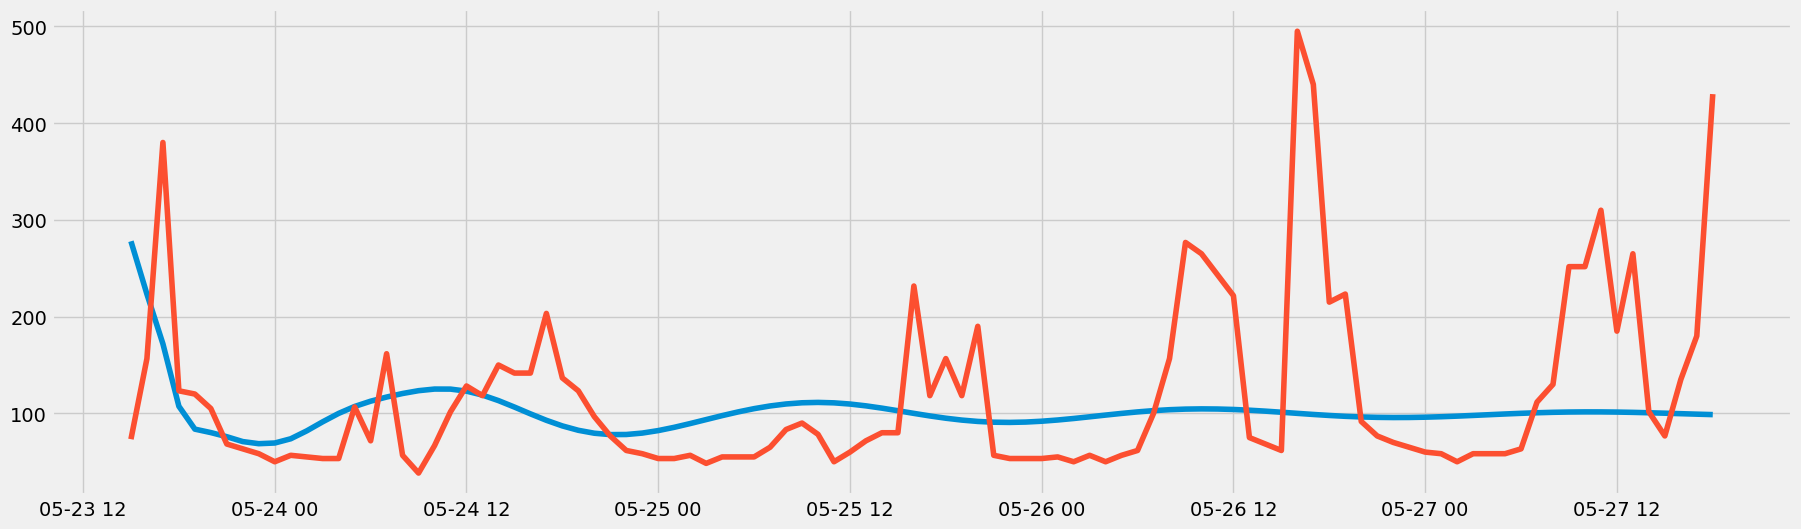

In [ ]:
plt.plot(pred['Appliances'])
plt.plot(valid['Appliances'])